In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import time
start=time.time()

In [3]:
print(pd.__version__)
print(np.__version__)

1.1.3
1.19.2


In [4]:
np.random.seed(4)

Read directly - doesnt work

In [5]:
import tarfile
from io import BytesIO
import requests
path = ('https://github.com/beoutbreakprepared/nCoV2019/blob/master/latest_data/latestdata.tar.gz?raw=true')

response = requests.get(path, stream=True)
with tarfile.open(fileobj=BytesIO(response.raw.read()), mode="r:gz") as tar_file:
     for member in tar_file.getmembers():
        f = tar_file.extractfile(member)
        data = pd.read_csv(f)

C:\Users\44759\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,2,9,10,12,13,14,15,16,17,19,20,21,22,23,24,25,26,27,31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
data_copy = data.copy()

Specify dtype - doesnt work

In [7]:
data.describe(include="all")

,ID,age,sex,city,province,country,latitude,longitude,geo_resolution,date_onset_symptoms,...,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary
count,2676311,578018,580157,1698630,2223647,2676196,2.676250e+06,2.676250e+06,2676250,261599,...,3148,640,13376,80434,826054,1257558,2645758,2.676250e+06,1742983,2610732
unique,2676311,390,2,8530,1245,146,NaN,NaN,6,170,...,144,203,342,409,2085,616,145,NaN,12,2
top,007-550118,35-59,male,Moscow,Central,India,NaN,NaN,point,20.03.2020,...,30.05.2020,Could be some cases from 23rd,Jaipur,Birmingham,Moscow,Central,India,NaN,TR,False
freq,1,72775,307188,149478,206921,301207,NaN,NaN,971106,6735,...,55,91,3545,3160,149476,200911,301207,NaN,1169963,2579528
mean,NaN,NaN,NaN,NaN,NaN,NaN,3.761411e+01,1.022147e+01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.431159e+03,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,2.048751e+01,4.827708e+01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.196783e+03,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,-5.480803e+01,-1.597276e+02,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+00,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.899523e+01,-2.952140e+00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.770000e+02,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,4.418521e+01,9.172073e+00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.345000e+03,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5.176213e+01,3.517355e+01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.139100e+04,NaN,NaN


Read in chunks - works first time

In [8]:
data.head()

,ID,age,sex,city,province,country,latitude,longitude,geo_resolution,date_onset_symptoms,...,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary
0,000-1-1,NaN,male,Shek Lei,Hong Kong,China,22.365019,114.133808,point,NaN,...,NaN,NaN,Shek Lei,NaN,NaN,Hong Kong,China,8029.0,NaN,NaN
1,000-1-10,78,male,Vo Euganeo,Veneto,Italy,45.297748,11.658382,point,NaN,...,22.02.2020,NaN,Vo' Euganeo,NaN,NaN,Veneto,Italy,8954.0,NaN,NaN
2,000-1-100,61,female,NaN,NaN,Singapore,1.353460,103.815100,admin0,NaN,...,17.02.2020,NaN,NaN,NaN,NaN,NaN,Singapore,200.0,NaN,NaN
3,000-1-1000,NaN,NaN,Zhengzhou City,Henan,China,34.629310,113.468000,admin2,NaN,...,NaN,NaN,NaN,NaN,Zhengzhou City,Henan,China,10091.0,NaN,NaN
4,000-1-10000,NaN,NaN,Pingxiang City,Jiangxi,China,27.513560,113.902900,admin2,NaN,...,NaN,NaN,NaN,NaN,Pingxiang City,Jiangxi,China,7060.0,NaN,NaN


In [9]:
data.columns

Index(['ID', 'age', 'sex', 'city', 'province', 'country', 'latitude',
       'longitude', 'geo_resolution', 'date_onset_symptoms',
       'date_admission_hospital', 'date_confirmation', 'symptoms',
       'lives_in_Wuhan', 'travel_history_dates', 'travel_history_location',
       'reported_market_exposure', 'additional_information',
       'chronic_disease_binary', 'chronic_disease', 'source',
       'sequence_available', 'outcome', 'date_death_or_discharge',
       'notes_for_discussion', 'location', 'admin3', 'admin2', 'admin1',
       'country_new', 'admin_id', 'data_moderator_initials',
       'travel_history_binary'],
      dtype='object')

In [10]:
data.shape

(2676311, 33)

In [11]:
data.value_counts()

Series([], dtype: int64)

In [12]:
data.isnull().sum()

ID                                0
age                         2098293
sex                         2096154
city                         977681
province                     452664
country                         115
latitude                         61
longitude                        61
geo_resolution                   61
date_onset_symptoms         2414712
date_admission_hospital     2560100
date_confirmation            108489
symptoms                    2674259
lives_in_Wuhan              2671973
travel_history_dates        2673700
travel_history_location     2667089
reported_market_exposure    2675242
additional_information      2630456
chronic_disease_binary            0
chronic_disease             2676096
source                       566964
sequence_available          2676299
outcome                     2368929
date_death_or_discharge     2673163
notes_for_discussion        2675671
location                    2662935
admin3                      2595877
admin2                      

In [13]:
null_df = pd.DataFrame(data.isnull().sum()).sort_values(by=0).T
null_df

,ID,chronic_disease_binary,admin_id,geo_resolution,latitude,longitude,country,country_new,travel_history_binary,date_confirmation,...,location,travel_history_location,lives_in_Wuhan,date_death_or_discharge,travel_history_dates,symptoms,reported_market_exposure,notes_for_discussion,chronic_disease,sequence_available
0,0,0,61,61,61,61,115,30553,65579,108489,...,2662935,2667089,2671973,2673163,2673700,2674259,2675242,2675671,2676096,2676299


In [14]:
c = 0
for i in null_df:
    if (null_df[i][0])>=2000000:
        c+=1

print("Total number of features: ", null_df.shape[1])
c

Total number of features:  33


17

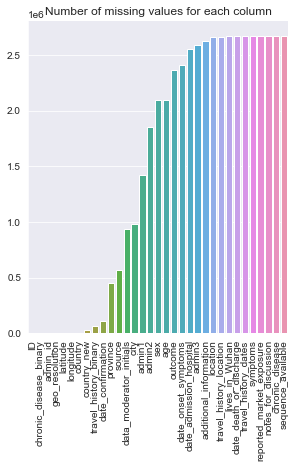

In [15]:
nan_plot = sns.catplot(data=null_df, kind="bar")
for axes in nan_plot.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

nan_plot.fig.suptitle('Number of missing values for each column')
nan_plot

--------------------------------------------------------------------------

## Cleaning Age

In [16]:
data["age"].value_counts(dropna=False)

NaN         2098293
35-59         72775
15-34         44573
60-79         33074
80+           20203
             ...   
13 month          1
30-60             1
5 month           1
23-24             1
121               1
Name: age, Length: 391, dtype: int64

In [17]:
pd.DataFrame(data["age"].value_counts(dropna=False))[:200].T

,NaN,35-59,15-34,60-79,80+,80-89,50-59,40-49,70-79,30-39,...,91.0,4,92.0,55-59,5,83,81,50-54,84,45-49
age,2098293,72775,44573,33074,20203,11469,9001,7696,6676,6306,...,223,214,213,211,210,205,204,183,182,182


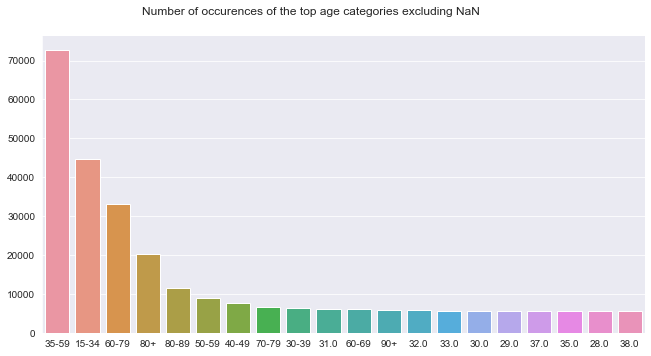

In [18]:
age_freq_plot = sns.catplot(data=pd.DataFrame(data["age"].value_counts(dropna=True))[:20].T, kind="bar")
age_freq_plot.fig.set_size_inches(10,5)
age_freq_plot.fig.subplots_adjust(top=0.9)
age_freq_plot.fig.suptitle('Number of occurences of the top age categories excluding NaN')
age_freq_plot

In [19]:
data["age"].unique()

array([nan, '78', '61', '66', '27', '17', '51', '68', '26', '30', '53',
       '35', '28', '58', '33', '50', '45', '24', '88', '29', '21', '52',
       '60', '56', '79', '40-49', '82', '25', '40', '20-29', '40-89',
       '60-69', '80-89', '50-59', '13-19', '30-39', '43', '7', '44', '69',
       '16', '47', '8', '10', '55', '38', '42', '34', '62', '39', '71',
       '64', '36', '31', '1', '48', '54', '70-79', '60-60', '65', '46',
       '57', '32', '37', '80-80', '73', '67', '0-6', '0-10', '22', '41',
       '10-19', '70', '96', '20', '63', '19', '1.75', '75', '18-65',
       '0.6666666667', '12', '49', '80', '77', '18', '72', '4', '15',
       '95', '0-18', '23', '65-99', '81', '90-99', '50-69', '85', '91',
       '87', '14', '19-65', '70-70', '60-70', '76', '94', '38-68', '0.5',
       '0.25', '9', '16-17', '5-59', '40-50', '13', '60-', '59', '12-19',
       '74', '18-50', '18-49', '41-60', '61-80', '18-60', '60-99',
       '40-69', '30-69', '40-45', '0-9', '11', '54-56', '0-19', '5'

In [20]:
import re

def age_processing(val):
    if '-' in str(val):
        split_values = str(val).split('-')
        if len(split_values)!=1:
            if split_values[1]!= '':
                return (int(split_values[0]) + int(split_values[1])//2)
            else:
                return (int(split_values[0]))
    elif '+' in str(val):
        split_values = str(val).split('+')
        if len(split_values)!=1:
            return (int(split_values[0]))
    elif '.' in str(val):
        return (round(eval(str(val))))
    elif 'month' in str(val) or 'week' in str(val):
         return (int(re.search(r'\d+', str(val)).group())//12)
    else:
        return (val)

data["age"] = data["age"].apply(lambda x: age_processing(x))

In [21]:
data["age"].value_counts(dropna=False)

NaN    2098293
64       82807
32       50565
99       33212
80       21023
        ...   
105          1
121          1
131          1
106          1
104          1
Name: age, Length: 225, dtype: int64

In [22]:
data["age"].unique()

array([nan, '78', '61', '66', '27', '17', '51', '68', '26', '30', '53',
       '35', '28', '58', '33', '50', '45', '24', '88', '29', '21', '52',
       '60', '56', '79', 64, '82', '25', '40', 34, 84, 94, 124, 79, 22,
       49, '43', '7', '44', '69', '16', '47', '8', '10', '55', '38', '42',
       '34', '62', '39', '71', '64', '36', '31', '1', '48', '54', 109, 90,
       '65', '46', '57', '32', '37', 120, '73', '67', 3, 5, '22', '41',
       19, '70', '96', '20', '63', '19', 2, '75', 50, 1, '12', '49', '80',
       '77', '18', '72', '4', '15', '95', 9, '23', 114, '81', 139, '85',
       '91', '87', '14', 51, 105, 95, '76', '94', 72, 0, '9', 24, 65,
       '13', 60, '59', 21, '74', 43, 42, 71, 101, 48, 74, 62, 4, '11', 82,
       '5', 35, 99, 28, '84', '2', 39, '86', 67, 92, 75, 55, 18, '83',
       112, 41, 47, 80, 54, 57, 30, 68, 10, '89', '3', 100, 110, '93',
       '6', '92', '97', 23, 56, 59, 58, 111, 69, 40, 52, '105', 44, 45,
       36, '0', 33, 77, '90', '99', '101', 17, 131, '9

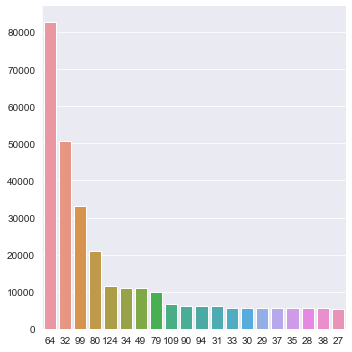

In [23]:
sns.catplot(data=pd.DataFrame(data["age"].value_counts(dropna=True))[:20].T, kind="bar")

<AxesSubplot:>

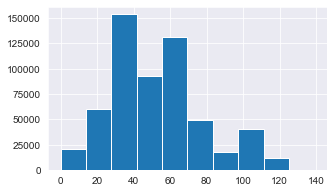

In [24]:
data["age"].astype(float).hist(figsize=(5,3))

--------------------------------------------------------------------------

### Explore 'chronic_disease' and 'chronic_disease_binary'

In [25]:
data['chronic_disease_binary'] = data['chronic_disease_binary'].astype(int)

In [26]:
data['chronic_disease_binary'].value_counts(dropna=False)

0    2676124
1        187
Name: chronic_disease_binary, dtype: int64

Problems of using 'chronic disease binary': imbalanced data could lead to misleading high accuracy

In [27]:
data['chronic_disease'].value_counts(dropna=False)

NaN                                                                                 2676096
https://coronavirus.dc.gov/page/coronavirus-data                                         48
hypertension                                                                             20
https://cv.nmhealth.org/2020/03/25/updated-new-mexico-covid-19-cases-now-at-112/         12
hypertension:diabetes                                                                    10
                                                                                     ...   
hypertension:renal disease                                                                1
hypertension:bronchial asthma:impaired fasting glucose                                    1
hypertension:hypothyroidism                                                               1
asthma:diabetes                                                                           1
diabetes:cardiac disease                                                        

<AxesSubplot:>

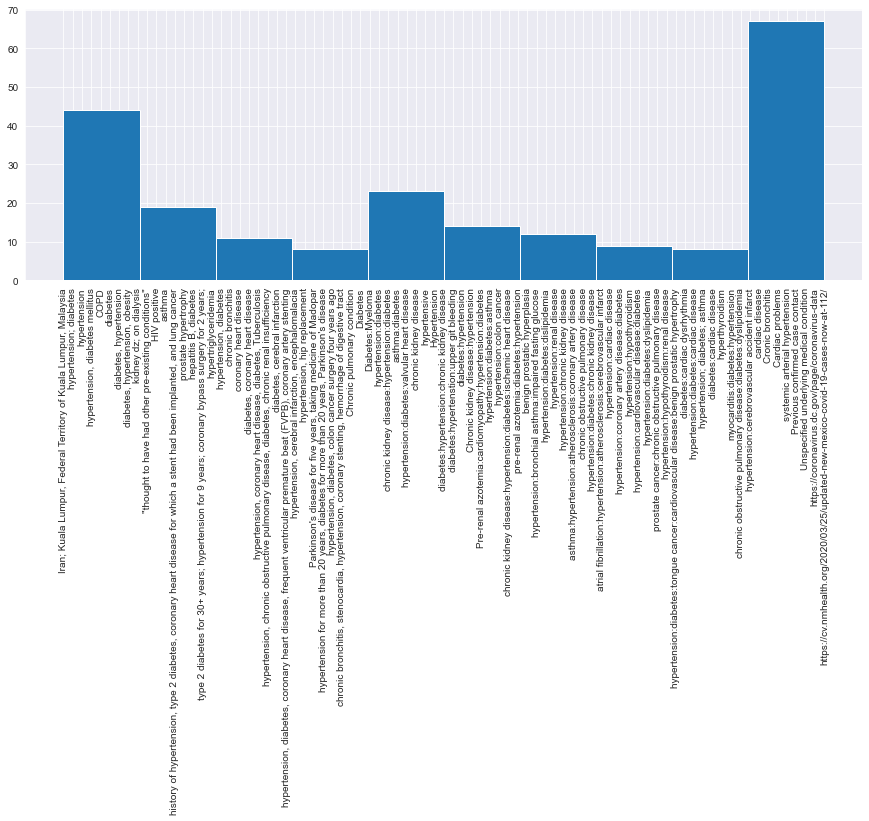

In [28]:
chronic_disease_hist = data["chronic_disease"].hist(figsize=(15,5))
plt.xticks(rotation = 90) 
chronic_disease_hist

In [29]:
data["chronic_disease_binary"].unique()

array([0, 1])

In [30]:
data_cdb_min = data[data["chronic_disease_binary"] == 1] # 187 instances
data_cdb_maj = data[data["chronic_disease_binary"] == 0] # 2676124 instances
data_cdb_maj.shape
#https://stackoverflow.com/questions/60773910/upweight-or-adding-weight-to-the-downsampled-examples

(2676124, 33)

In [31]:
pd.DataFrame(data["chronic_disease_binary"].value_counts(dropna=False)).T

,0,1
chronic_disease_binary,2676124,187


C:\Users\44759\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chronic_disease_binary', ylabel='count'>

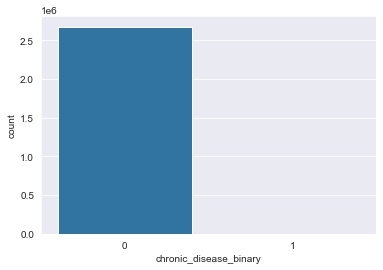

In [32]:
sns.countplot(data["chronic_disease_binary"])

Due to the intensity of the skewness of data (2676124 0 instances and 187 1 instances), this feature will be dropped in the dataset.

--------------------------------------------------------------------------

### Explore symptoms

In [33]:
data["symptoms"].unique()

array([nan, 'fever, severe pneumonia', 'fever',
       'cough, fever, sore throat', 'cough, fever', 'dyspnea, fever',
       'cough, difficulty breathing, fever', 'fever (38 ° C)',
       '37.1 ° C, mild coughing', 'cough',
       'abdominal pain, pulmonary inflammation', 'Sore throat',
       'feeling ill, coughing',
       'abdominal pain, diarrhea, fever, general malaise',
       'poor physical condition', 'cough, fatigue, fever', 'yes',
       'fever 38.3', 'fever (39.5 ℃)', 'fever 37.7℃', 'fever 37.5℃',
       'anorexia', 'nausea, cough, pneumonia, fever',
       'fever 38.2 ℃, cough', 'fever 37 C', 'malaise, headache',
       'fever (37 ℃), breathing difficulty',
       'fever (37.5 ℃, then 38 ℃), cough, malaise',
       'sore throat, Cough, fever (37 ℃)',
       'fever, shortness of breath, pneumonia', 'severe dyspnea',
       'fever, cough', 'nausea', 'fever; fatigue',
       'chest tightness; fatigue', 'cough; fever',
       'fever; nasal congestion; runny nose; sore throat; c

'fever' OR 'Fever', 'pneumonia', 'cough', 'Cough', 'coughing' OR 'couh' OR 'cough symptoms', 'sore throat' OR 'Sore throat' OR 'sore throa', 'chills', 'dyspnea', 'difficulty breathing' OR 'breathing difficulty' OR 'shortness of breath' OR 'respiratory complaints', 'similar to a respiratory infection' OR 'acute respiratory viral infection (ARVI)', 'abdominal pain', 'diarrhea', 'malaise', 'myalgia', 'rhinorrhea', 'fatigue' OR 'Fatigue', 'anorexia', 'chest tightness' OR 'chest pain', 'nasal congestion', 'runny nose' OR 'nasal discharge', 'no respiratory symptoms' OR 'asymptomatic', 'esophageal reflux', 'sputum' OR 'Sputum', 'sore body', 'cold', 'Discharge', 'phlegm', 'headache' OR 'headache.', 'toothache', 'vomiting', 'muscle'(pain) OR 'aching muscles','joint pain', 'pneumonitis', 'no serious symptoms', 'dizziness', 'sore limbs', 'systemic weakness', 'difficulty walking', 'sneezing', 'afebrile', 'conjunctivitis' ...

In [34]:
# Count the occurrences of the most frequent symptoms
fever_count = 0
mild_count = 0
moderate_count = 0
cough_count = 0
respiratory_count = 0
for i in data["symptoms"]:
    if i!=np.nan:
        # 'fever' OR 'Fever'
        if 'FEVER' in str(i).upper():
            fever_count+=1
        if 'MILD' in str(i).upper():
            mild_count+=1
        if 'MODERATE' in str(i).upper():
            moderate_count+=1
        # 'cough', 'Cough', 'coughing' OR 'couh' OR 'cough symptoms'
        if 'COUGH' in str(i).upper() or 'COUH' in str(i).upper():
            cough_count+=1
        if 'RESPIRATORY' in str(i).upper():
            respiratory_count+=1
print(fever_count, mild_count, moderate_count,cough_count, respiratory_count)

1072 452 385 595 117


Create new column that shows signs of fever

In [35]:
def fever_processing(val):
    if 'FEVER' in str(val).upper():
        return 1
    elif str(val) == 'nan':
        return val
        
    else:
        return 0

data["fever"] = data["symptoms"].apply(fever_processing)

In [36]:
data["fever"].value_counts(dropna=False)

NaN    2674259
1.0       1072
0.0        980
Name: fever, dtype: int64

C:\Users\44759\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fever', ylabel='count'>

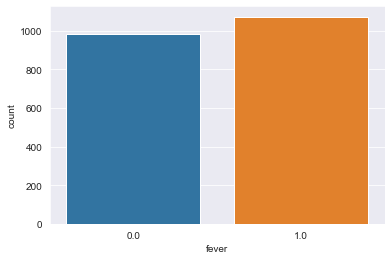

In [37]:
sns.countplot(data["fever"])


--------------------------------------------------------------------------

In [38]:
for column in data.columns:
    print('Column name: ' + column)
    print(data[column].value_counts(dropna=False))
    print('\n')

Column name: ID
007-550118    1
002-95979     1
007-199712    1
008-213525    1
007-134143    1
             ..
002-75160     1
005-33027     1
002-199597    1
003-16140     1
010-32099     1
Name: ID, Length: 2676311, dtype: int64


Column name: age
NaN    2098293
64       82807
32       50565
99       33212
80       21023
        ...   
105          1
121          1
131          1
106          1
104          1
Name: age, Length: 225, dtype: int64


Column name: sex
NaN       2096154
male       307188
female     272969
Name: sex, dtype: int64


Column name: city
NaN                     977681
Moscow                  149478
Mumbai                   56178
Moscow Oblast            29170
Chennai                  23886
                         ...  
Telemaco Borba               1
Cartagena del Chaira         1
Walla Walla County           1
Choctaw County               1
Milkichak                    1
Name: city, Length: 8531, dtype: int64


Column name: province
NaN              452664
Ce

NaN                                                                                                   566964
https://raw.githubusercontent.com/datadista/datasets/master/COVID%2019/ccaa_covid19_casos_long.csv    238951
https://coronavirus.data.gov.uk/                                                                      229310
stopcoronavirus.rf                                                                                    198054
https://www.worldometers.info/coronavirus/country/turkey/                                             159779
                                                                                                       ...  
https://npgeo-corona-npgeo-de.hub.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0?page=1861         1
https://npgeo-corona-npgeo-de.hub.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0?page=1025         1
https://npgeo-corona-npgeo-de.hub.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0?page=2055         1
https://npgeo-coron

India                               301207
Russia                              299568
United Kingdom                      299469
Spain                               255108
Italy                               231006
                                     ...  
Saint Vincent and the Grenadines         1
Lithuania                                1
Gambia                                   1
Liechtenstein                            1
Andorra                                  1
Name: country_new, Length: 146, dtype: int64


Column name: admin_id
228.0      159779
6345.0     149476
235.0      107767
577.0       57756
10966.0     56178
            ...  
11315.0         1
11316.0         1
4584.0          1
4581.0          1
14949.0         1
Name: admin_id, Length: 10109, dtype: int64


Column name: data_moderator_initials
TR          1169963
NaN          933328
ZW           570859
FS             1994
DSC              90
SL               34
NRF, DSC         30
FS,PA             7
FS, PA           

In [39]:
count = 0
for val in data["chronic_disease"]:
    if "HYPERTENSION" in str(val).upper():
        count+=1
print(count)

97


In [40]:
data["sex"].value_counts(dropna=False)

NaN       2096154
male       307188
female     272969
Name: sex, dtype: int64

## Dates

In [41]:
data["date_confirmation"].value_counts(dropna=False)

NaN                        108489
26.03.2020                  48319
27.03.2020                  43379
23.03.2020                  39288
06.05.2020                  38679
                            ...  
17.01.2020                      2
15.01.2020                      2
12.01.2020                      2
06.03.2020 - 08.03.2020         2
06.01.2020                      2
Name: date_confirmation, Length: 179, dtype: int64

In [42]:
data["date_admission_hospital"].value_counts(dropna=False)

NaN           2560100
01.04.2020       4784
02.04.2020       4534
31.03.2020       4204
03.04.2020       4176
               ...   
31.12.2019          2
04.01.2020          2
06.01.2020          1
10.12.2019          1
01.01.2020          1
Name: date_admission_hospital, Length: 163, dtype: int64

In [43]:
data["date_onset_symptoms"].value_counts(dropna=False)

NaN                      2414712
20.03.2020                  6735
23.03.2020                  6436
16.03.2020                  6336
27.03.2020                  6191
                          ...   
20.12.2019                     1
26.11.2020                     1
30.12.2019                     1
01.01.2020-12.01.2020          1
23.12.2019                     1
Name: date_onset_symptoms, Length: 171, dtype: int64

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2676311 entries, 0 to 2676310
Data columns (total 34 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   ID                        object 
 1   age                       object 
 2   sex                       object 
 3   city                      object 
 4   province                  object 
 5   country                   object 
 6   latitude                  float64
 7   longitude                 float64
 8   geo_resolution            object 
 9   date_onset_symptoms       object 
 10  date_admission_hospital   object 
 11  date_confirmation         object 
 12  symptoms                  object 
 13  lives_in_Wuhan            object 
 14  travel_history_dates      object 
 15  travel_history_location   object 
 16  reported_market_exposure  object 
 17  additional_information    object 
 18  chronic_disease_binary    int32  
 19  chronic_disease           object 
 20  source                  

In [45]:
data_copy["date_admission_hospital"].value_counts(dropna=False)

NaN           2560100
01.04.2020       4784
02.04.2020       4534
31.03.2020       4204
03.04.2020       4176
               ...   
31.12.2019          2
04.01.2020          2
06.01.2020          1
10.12.2019          1
01.01.2020          1
Name: date_admission_hospital, Length: 163, dtype: int64

In [46]:
from datetime import datetime

def find_mid_date(first, second):
    date_format = "%d.%m.%Y"
    a = datetime.strptime(str(first), date_format)
    b = datetime.strptime(str(second), date_format)
    delta = a + (b - a)/2
    return delta.date().strftime("%d.%m.%Y")

In [47]:
temporary = []
for val in data["date_confirmation"]:
    if '-' in str(val):
        arr_dates = str(val).split("-")
        temporary.append(find_mid_date(arr_dates[0].replace(" ",""),arr_dates[1].replace(" ","")))
    elif str(val) == 'nan':
        temporary.append(val)
    else:
        temporary.append(val)
date_confirmation_col = pd.Series(temporary)
data["date_confirmation"] = date_confirmation_col

In [48]:
temporary = []
for val in data["date_onset_symptoms"]:
    if '-' in str(val):
        arr_dates = str(val).split("-")
        # use replace to remove whitespace
        temporary.append(find_mid_date(arr_dates[0].replace(" ",""),arr_dates[1].replace(" ","")))
    elif str(val) == 'nan':
        temporary.append(val)
    else:
        temporary.append(val)
date_onset_symptoms_col = pd.Series(temporary)
data["date_onset_symptoms"] = date_onset_symptoms_col

In [49]:
temporary = []
for val in data["date_admission_hospital"]:
    if '-' in str(val):
        arr_dates = str(val).split("-")
        temporary.append(find_mid_date(arr_dates[0].replace(" ",""),arr_dates[1].replace(" ","")))
    elif str(val) == 'nan':
        temporary.append(val)
    else:
        temporary.append(val)
date_admission_hospital_col = pd.Series(temporary)
data["date_admission_hospital"] = date_admission_hospital_col

In [50]:
def find_diff_days(first, second):
    date_format = "%d.%m.%Y"
    a = datetime.strptime(str(first), date_format)
    b = datetime.strptime(str(second), date_format)
    delta = (b - a)
    return delta.days

In [51]:
temporary = []
# number of days elapsed between date of confirmation and date of admission
# into hospital
for conf_val, adm_val in zip(data["date_confirmation"],data["date_admission_hospital"]):
    if str(conf_val) == 'nan' or str(adm_val) == 'nan':
        if str(conf_val) == 'nan':
            temporary.append(conf_val)
        else:
            temporary.append(adm_val)
    else:
        temporary.append(find_diff_days(conf_val,adm_val))
days_conf_admission_col = pd.Series(temporary)
data["days_conf_admission"] = days_conf_admission_col

In [52]:
data["days_conf_admission"].unique()

array([ nan,  -9., -14.,  -1.,   1.,  -5.,   0.,  -3.,  -7.,  -4.,  -2.,
       -11.,  22., -34., -13.,  -6.,  27., -60.,  28.,  -8., -10.,   4.,
       -12., -17.,  25.,  29.,   2., -21., -69., -24., -16.,  21., -22.,
       -76., -18., -29.,   3., -65.,  10., -15., -25.,  26., -28., -23.,
         5.,  36., -62.,  40., -44., -56.,   6., -35., -30., -54., -58.,
       -42.,  11., -19., -55., -20., -26.,   7.,  12., -43.,   8.,  15.,
       -37., -27., -31., -32., -33.,  13.,   9.,  18.,  14., -45., -41.,
       -52.,  23.])

In [53]:
data["days_conf_admission"].value_counts(dropna=False)

 NaN     2666926
-1.0        3095
-2.0        1668
 0.0        1546
-3.0         844
          ...   
 25.0          1
-55.0          1
-54.0          1
-52.0          1
-44.0          1
Name: days_conf_admission, Length: 79, dtype: int64

In [54]:
from dateutil.parser import parse

In [55]:
temporary = []
# number of days elapsed between date of confirmation and date of admission
# into hospital
for onset_val, adm_val in zip(data["date_onset_symptoms"],data["date_admission_hospital"]):
    if str(onset_val) == 'nan' or str(adm_val) == 'nan':
        if str(onset_val) == 'nan':
            temporary.append(onset_val)
        else:
            temporary.append(adm_val)
    else:
        # ensure the dates are in the correct format
        adm_val = datetime.strftime(parse(adm_val), '%d.%m.%Y')
        onset_val = datetime.strftime(parse(onset_val), '%d.%m.%Y')
        temporary.append(find_diff_days(onset_val,adm_val))
days_onset_admission_col = pd.Series(temporary)
data["days_onset_admission"] = days_onset_admission_col

In [56]:
data["days_onset_admission"].value_counts(dropna=False)

 NaN      2668056
 0.0         1378
 1.0         1030
 2.0          765
 3.0          613
           ...   
-196.0          1
-194.0          1
 79.0           1
-193.0          1
 258.0          1
Name: days_onset_admission, Length: 305, dtype: int64

In [57]:
from dateutil.parser import parse
temporary = []
# number of days elapsed between date of confirmation and date of admission
# into hospital
for onset_val, conf_val in zip(data["date_onset_symptoms"],data["date_confirmation"]):
    if str(onset_val) == 'nan' or str(conf_val) == 'nan':
        if str(onset_val) == 'nan':
            temporary.append(onset_val)
        else:
            temporary.append(conf_val)
    else:
        # ensure the dates are in the correct format
        conf_val = datetime.strftime(parse(conf_val), '%d.%m.%Y')
        onset_val = datetime.strftime(parse(onset_val), '%d.%m.%Y')
        temporary.append(find_diff_days(onset_val,conf_val))
days_onset_conf_col = pd.Series(temporary)
data["days_onset_conf"] = days_onset_conf_col

In [58]:
np.sum(data["days_onset_conf"].count())

261469

In [59]:
np.sum(data["days_onset_conf"].isna())

2414842

In [60]:
np.sum(data["days_onset_conf"].isna())+np.sum(data["days_onset_conf"].count())

2676311

In [61]:
data["days_onset_conf"].value_counts(dropna=False)

 NaN      2414842
 0.0        73258
 3.0        11045
 4.0        10248
 2.0        10016
           ...   
-246.0          1
 307.0          1
-119.0          1
 89.0           1
 237.0          1
Name: days_onset_conf, Length: 526, dtype: int64

In [62]:
np.sum(data["outcome"].isna())+np.sum(data["outcome"].count())

2676311

In [63]:
data["days_onset_conf"]

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
           ..
2676306   NaN
2676307   NaN
2676308   NaN
2676309   NaN
2676310   NaN
Name: days_onset_conf, Length: 2676311, dtype: float64

<AxesSubplot:>

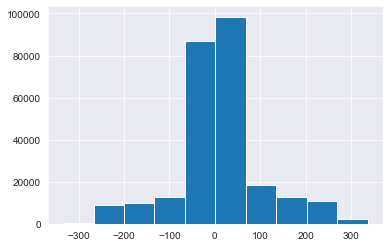

In [64]:
data["days_onset_conf"].hist()

<AxesSubplot:>

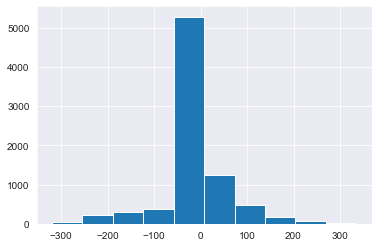

In [65]:
data["days_onset_admission"].hist()

<AxesSubplot:>

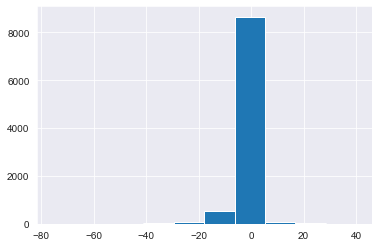

In [66]:
data["days_conf_admission"].hist()

In [67]:
data["age"].describe()

count     578018
unique       224
top           64
freq       82807
Name: age, dtype: int64

<AxesSubplot:>

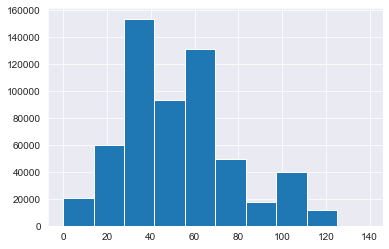

In [68]:
data["age"] = data["age"].astype(float)
data["age"].hist()

<AxesSubplot:>

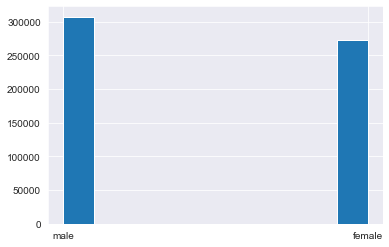

In [69]:
data["sex"].hist()

In [70]:
data["symptoms"].value_counts(dropna=False)

NaN                                                                    2674259
fever                                                                      320
Mild to moderate                                                           257
Mild:moderate                                                              128
cough, fever                                                               126
                                                                        ...   
severe                                                                       1
cardiac arrhythmia:septic shock:pneumonia                                    1
headache, general weakness, runny nose, mialgia                              1
myocardial infarction:acute respiratory distress syndrome:pneumonia          1
pneumonia:acute respiratory failure:heart failure                            1
Name: symptoms, Length: 449, dtype: int64

### Clean country

<AxesSubplot:>

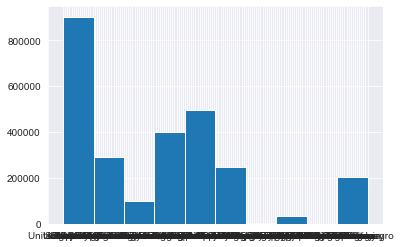

In [71]:
data["country"].hist()

In [72]:
data["country"].value_counts(dropna=False)[:50]

India                     301207
Russia                    299568
United Kingdom            299469
Spain                     255108
Italy                     231006
Germany                   183431
Peru                      181244
Turkey                    159779
United States             120979
France                    110158
Belgium                    59259
China                      42397
Sweden                     40444
Belarus                    38884
Colombia                   38407
Egypt                      33932
Ukraine                    31136
Austria                    25200
Argentina                  24744
Mexico                     23558
Philippines                22486
Ireland                    22181
Serbia                     11272
Moldova                    11081
Ecuador                    10947
Netherlands                10880
South Africa               10527
Czech Republic              8898
South Korea                 7098
Iran                        7026
Finland   

In [73]:
len(data["country"].unique()) #147 different countries

147

In [74]:
data_copy["country"].value_counts(dropna=False)[data_copy["country"].value_counts(dropna=False)<=5].count()

33

In [75]:
sum(data["country"].value_counts(dropna=False)[20:]) # number of instances not in top 20

176401

In [76]:
top20_vals = dict(data["country"].value_counts(dropna=False)[:20]).keys()

def top20_counties(x):
    if x not in top20_vals:
        return 'Other'
    else:
        return x
data["country"] = data["country"].apply(lambda x: top20_counties(x))

In [77]:
from sklearn import preprocessing
data = data[data['country'].notna()]
label_encoder = preprocessing.LabelEncoder()
data['country']= label_encoder.fit_transform(data['country'].astype(str))

In [78]:
data["country"].value_counts(dropna=False)[:50]

9     301207
14    299568
19    299469
15    255108
10    231006
8     183431
13    181244
12    176401
17    159779
20    120979
7     110158
3      59259
4      42397
16     40444
2      38884
5      38407
6      33932
18     31136
1      25200
0      24744
11     23558
Name: country, dtype: int64

Current problem: countries with small number of instances included. They may not be included in the training data

### Clean Province

In [79]:
data["province"].value_counts(dropna=False)

NaN              452664
Central          206921
England          156106
Maharashtra      106515
Lima              99326
                  ...  
Laghouat              1
Guatemala             1
Zhytomyr              1
TARATA                1
Suchitepequez         1
Name: province, Length: 1246, dtype: int64

In [80]:
# Number of instances with only one occurence
data["province"].value_counts(dropna=False)[data["province"].value_counts(dropna=False)==1].count()

82

In [81]:
top100_vals_prov = dict(data["province"].value_counts(dropna=False)[:100]).keys()

def top100_vals(x):
    if x not in top100_vals_prov:
        return 'Other'
    else:
        return x
data["province"] = data["province"].apply(lambda x: top100_vals(x))

Provinces not in the top 100 occurences are labelled as 'Other'

In [82]:
label_encoder = preprocessing.LabelEncoder()
data['province'] = label_encoder.fit_transform(data['province'].astype(str))
data['province'].unique()

array([ 65,  93, 100,  29,  49,  15,  26,  68,   5,  97,  63,  20,  47,
        71,  28,  86,  53,  17,   7,  58,  77,  56,  67,  30,  32,  11,
        12,  37,  73,  90,  85,  57,  33,  43,  42,   4,  19,  45,  34,
         2,  10,  35,  38,  64,  70,  96,  95,  46,  41,  62,  55,  98,
         1,  36,  52,  50,  72,  27,   8,  84,  81,  44,  83,  51,  88,
        82,  92,  22,  94,  61,  89,  31,  99,  24,   6,  79,  66,  59,
        60,  40,  74,  75,  39,  80,  78,   0,  21,  13,  48,  23,  91,
         9,  16,  69,  25,  18,  87,   3,  76,  54,  14])

### Clean outcome

In [83]:
data["outcome"].unique()

array(['critical condition, intubated as of 14.02.2020', 'death',
       'discharge', nan, 'discharged', 'Discharged',
       'Discharged from hospital', 'not hospitalized', 'recovered',
       'recovering at home 03.03.2020', 'released from quarantine',
       'severe', 'stable', 'died', 'Death', 'dead',
       'Symptoms only improved with cough. Currently hospitalized for follow-up.',
       'treated in an intensive care unit (14.02.2020)', 'Alive', 'Dead',
       'Recovered', 'Stable', 'Died', 'Deceased', 'stable condition',
       'Under treatment', 'Critical condition', 'Receiving Treatment',
       'severe illness', 'unstable', 'critical condition', 'Hospitalized',
       'Migrated', 'Migrated_Other',
       'https://www.mspbs.gov.py/covid-19.php'], dtype=object)

Different labels for died: 'death', 'died', 'Death', 'dead', 'Dead', 'Died', 'Deceased'

In [84]:
temporary = []
for val in data["outcome"]:
    if str(val) in ['death', 'died', 'Death', 'dead', 'Dead', 'Died', 'Deceased']:
        temporary.append(1)
    elif str(val) == 'nan':
        temporary.append(val)
        
    else:
        temporary.append(0)
outcome_standardised = pd.Series(temporary)
data["outcome"] = outcome_standardised

TO DO: REMOVE HTTPS LINK

In [85]:
data["outcome"].value_counts(dropna=False)

NaN    2368929
0.0     301383
1.0       5999
Name: outcome, dtype: int64

In [86]:
data_copy["outcome"].value_counts(dropna=False)

NaN                                                                         2368929
Hospitalized                                                                 202475
Recovered                                                                     93656
Deceased                                                                       5011
recovered                                                                      3659
died                                                                            916
Under treatment                                                                 370
Receiving Treatment                                                             257
Alive                                                                           189
discharge                                                                       175
stable                                                                          156
stable condition                                                            

<AxesSubplot:>

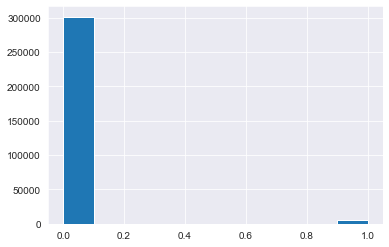

In [87]:
data["outcome"].hist()

<AxesSubplot:>

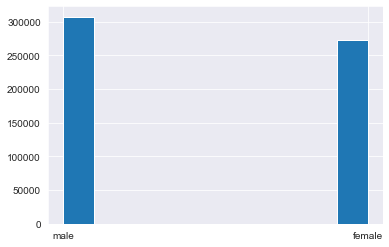

In [88]:
data["sex"].hist()

<AxesSubplot:>

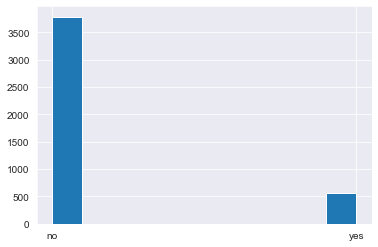

In [89]:
data["lives_in_Wuhan"].hist()

## Cleaning city

In [90]:
data['city'].value_counts(dropna=False)

NaN                     977681
Moscow                  149478
Mumbai                   56178
Moscow Oblast            29170
Chennai                  23886
                         ...  
Telemaco Borba               1
Cartagena del Chaira         1
Walla Walla County           1
Choctaw County               1
Milkichak                    1
Name: city, Length: 8531, dtype: int64

In [91]:
sum(data_copy["city"].value_counts(dropna=False)[1500:]) 

98526

In [92]:
top1500_vals_city = dict(data["city"].value_counts(dropna=False)[:100]).keys()

def top1500_vals(x):
    if x not in top1500_vals_city:
        return 'Other'
    else:
        return x
data["city"] = data["city"].apply(lambda x: top1500_vals(x))

In [93]:
#data = data[data['city'].notna()]
label_encoder = preprocessing.LabelEncoder()
data['city']= label_encoder.fit_transform(data['city'].astype(str))

In [94]:
data['city'].value_counts(dropna=False)

100    977681
62     890865
52     149478
55      56178
53      29170
        ...  
81       2827
41       2789
23       2783
73       2753
43       2751
Name: city, Length: 101, dtype: int64

### Modifying sex

In [95]:
data["sex"] = data["sex"].replace('male', 1)
data["sex"] = data["sex"].replace('female', 0)

In [96]:
import seaborn as sns

In [97]:
data["reported_market_exposure"].value_counts(dropna=False)
# Drop this because data will be skewed

NaN                                              2675242
na                                                   992
no                                                    71
yes                                                    4
contact with a positive case                           1
yes, retailer in the seafood wholesale market          1
Name: reported_market_exposure, dtype: int64

Text(0.5, 1.0, 'count outcome')

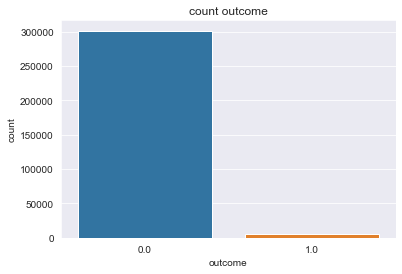

In [98]:
sns.countplot(x='outcome', data=data)
plt.title("count outcome")

Text(0.5, 1.0, 'count sex')

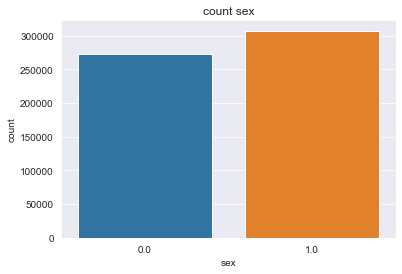

In [99]:
sns.countplot(x='sex', data=data)
plt.title("count sex")

Text(0.5, 1.0, 'Number of people dead/alive based on sex')

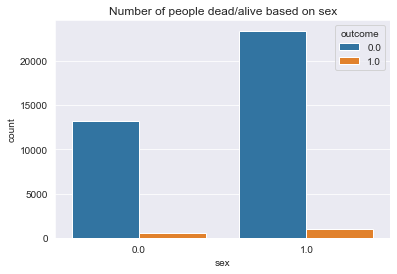

In [100]:
sns.countplot(x='sex', data=data, hue="outcome")
plt.title("Number of people dead/alive based on sex")

Text(0.5, 1.0, 'count fever')

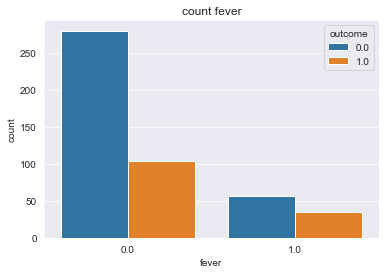

In [101]:
sns.countplot(x='fever', data=data, hue="outcome")
plt.title("count fever")

<AxesSubplot:xlabel='outcome', ylabel='age'>

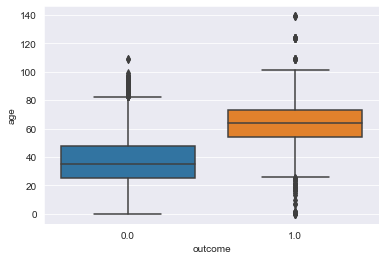

In [102]:
sns.boxplot(x='outcome',y='age', data=data)

drop_cols = ["reported_market_exposure", "ID", "date_onset_symptoms", "notes_for_discussion", "additional_information", "travel_history_dates", "admin_id"]

In [103]:
data

,ID,age,sex,city,province,country,latitude,longitude,geo_resolution,date_onset_symptoms,...,admin2,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary,fever,days_conf_admission,days_onset_admission,days_onset_conf
0,000-1-1,NaN,1.0,62,65,4,22.365019,114.133808,point,NaN,...,NaN,Hong Kong,China,8029.0,NaN,NaN,NaN,NaN,NaN,NaN
1,000-1-10,78.0,1.0,62,93,10,45.297748,11.658382,point,NaN,...,NaN,Veneto,Italy,8954.0,NaN,NaN,NaN,NaN,NaN,NaN
2,000-1-100,61.0,0.0,100,100,12,1.353460,103.815100,admin0,NaN,...,NaN,NaN,Singapore,200.0,NaN,NaN,NaN,NaN,NaN,NaN
3,000-1-1000,NaN,NaN,62,65,4,34.629310,113.468000,admin2,NaN,...,Zhengzhou City,Henan,China,10091.0,NaN,NaN,NaN,NaN,NaN,NaN
4,000-1-10000,NaN,NaN,62,65,4,27.513560,113.902900,admin2,NaN,...,Pingxiang City,Jiangxi,China,7060.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2676306,010-99995,52.0,0.0,62,25,13,-8.378190,-74.539700,point,NaN,...,NaN,NaN,Peru,14429.0,NaN,False,NaN,NaN,NaN,NaN
2676307,010-99996,52.0,0.0,62,48,13,-12.076530,-77.067350,point,NaN,...,NaN,NaN,Peru,14695.0,NaN,False,NaN,NaN,NaN,NaN
2676308,010-99997,52.0,0.0,20,48,13,-11.932980,-77.040850,point,NaN,...,NaN,NaN,Peru,14400.0,NaN,False,NaN,NaN,NaN,NaN
2676309,010-99998,52.0,1.0,15,16,13,-12.000740,-77.118240,point,NaN,...,NaN,NaN,Peru,14516.0,NaN,False,NaN,NaN,NaN,NaN


In [104]:
data.head()

,ID,age,sex,city,province,country,latitude,longitude,geo_resolution,date_onset_symptoms,...,admin2,admin1,country_new,admin_id,data_moderator_initials,travel_history_binary,fever,days_conf_admission,days_onset_admission,days_onset_conf
0,000-1-1,NaN,1.0,62,65,4,22.365019,114.133808,point,NaN,...,NaN,Hong Kong,China,8029.0,NaN,NaN,NaN,NaN,NaN,NaN
1,000-1-10,78.0,1.0,62,93,10,45.297748,11.658382,point,NaN,...,NaN,Veneto,Italy,8954.0,NaN,NaN,NaN,NaN,NaN,NaN
2,000-1-100,61.0,0.0,100,100,12,1.353460,103.815100,admin0,NaN,...,NaN,NaN,Singapore,200.0,NaN,NaN,NaN,NaN,NaN,NaN
3,000-1-1000,NaN,NaN,62,65,4,34.629310,113.468000,admin2,NaN,...,Zhengzhou City,Henan,China,10091.0,NaN,NaN,NaN,NaN,NaN,NaN
4,000-1-10000,NaN,NaN,62,65,4,27.513560,113.902900,admin2,NaN,...,Pingxiang City,Jiangxi,China,7060.0,NaN,NaN,NaN,NaN,NaN,NaN


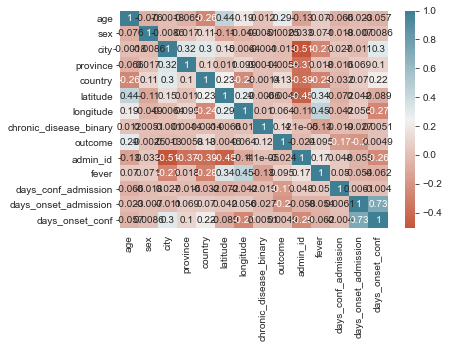

In [105]:
correlation_matrix = data.corr()
#plt.figure(figsize=(10, 16))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.diverging_palette(20, 220, n=500))
plt.show()

heatmap before dropping values

In [106]:
new_df4 = data[['sex', 'age', 'outcome','country', 'chronic_disease_binary', 'city','province']].copy()
new_df4.dropna(inplace=True)
new_df4.shape

(33601, 7)

In [107]:
new_df3 = data[['sex', 'age', 'outcome','country', 'chronic_disease_binary', 'city', 'province','days_onset_conf']].copy()
new_df3.dropna(inplace=True)
new_df3.shape

(3495, 8)

In [108]:
new_df2 = data[['sex', 'age', 'outcome','fever', 'chronic_disease_binary']].copy()
new_df2.dropna(inplace=True)
new_df2.shape

(215, 5)

In [109]:
new_df1 = data[['sex', 'age', 'outcome','country', 'chronic_disease_binary']].copy()
new_df1.dropna(inplace=True)
new_df1.shape

(33601, 5)

In [110]:
new_df = data[['sex', 'age', 'outcome','country', 'chronic_disease_binary', 'city']].copy()
new_df.dropna(inplace=True)
new_df.shape

(33601, 6)

In [111]:
new_df = new_df4

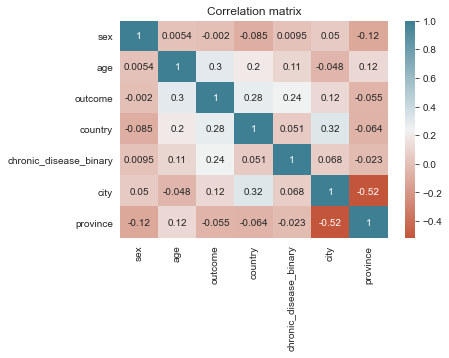

In [112]:
correlation_matrix = new_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap=sns.diverging_palette(20, 220, n=500))
plt.title("Correlation matrix")
plt.show()

In [113]:
new_df["age"] = new_df["age"].astype(float)

In [114]:
# new_df.hist()

array([[<AxesSubplot:xlabel='sex', ylabel='sex'>,
        <AxesSubplot:xlabel='age', ylabel='sex'>,
        <AxesSubplot:xlabel='outcome', ylabel='sex'>,
        <AxesSubplot:xlabel='country', ylabel='sex'>,
        <AxesSubplot:xlabel='chronic_disease_binary', ylabel='sex'>,
        <AxesSubplot:xlabel='city', ylabel='sex'>],
       [<AxesSubplot:xlabel='sex', ylabel='age'>,
        <AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='outcome', ylabel='age'>,
        <AxesSubplot:xlabel='country', ylabel='age'>,
        <AxesSubplot:xlabel='chronic_disease_binary', ylabel='age'>,
        <AxesSubplot:xlabel='city', ylabel='age'>],
       [<AxesSubplot:xlabel='sex', ylabel='outcome'>,
        <AxesSubplot:xlabel='age', ylabel='outcome'>,
        <AxesSubplot:xlabel='outcome', ylabel='outcome'>,
        <AxesSubplot:xlabel='country', ylabel='outcome'>,
        <AxesSubplot:xlabel='chronic_disease_binary', ylabel='outcome'>,
        <AxesSubplot:xlabel='city', ylabel='o

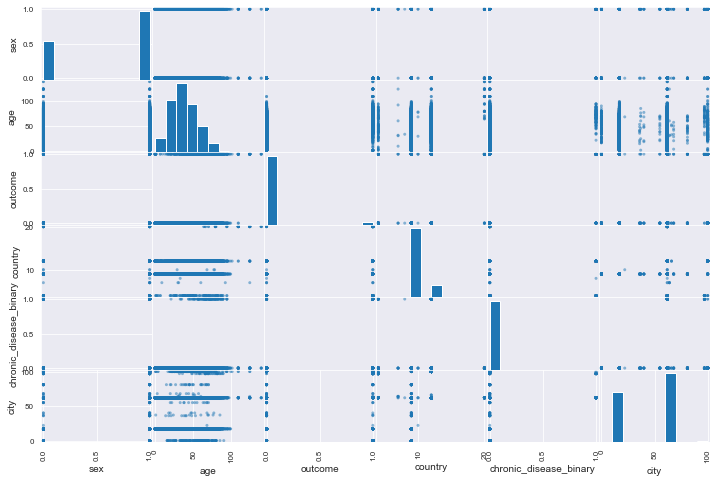

In [115]:
from pandas.plotting import scatter_matrix

attributes = ['sex', 'age', 'outcome','country', 'chronic_disease_binary', 'city']
scatter_matrix(new_df[attributes], figsize=(12, 8))

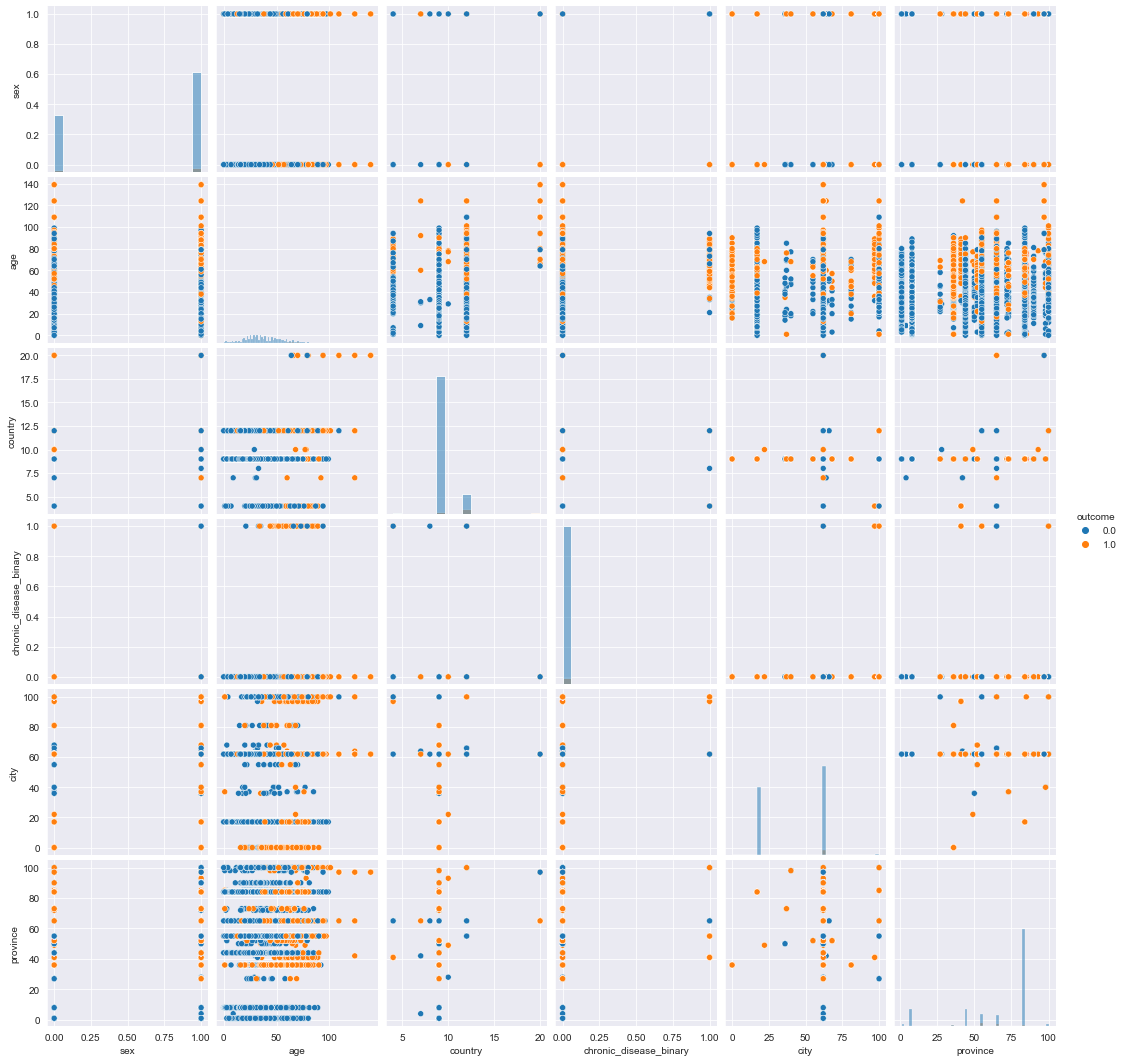

In [116]:
sns.pairplot(new_df,diag_kind="hist", hue="outcome")

C:\Users\44759\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\44759\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\44759\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

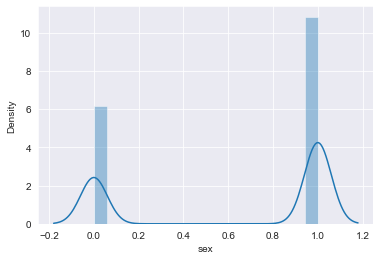

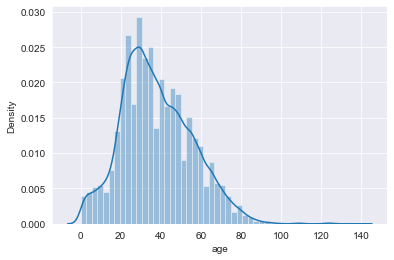

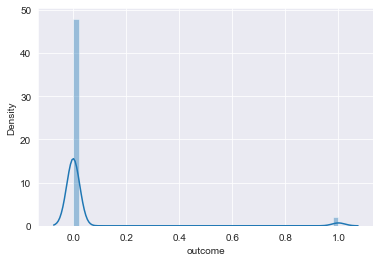

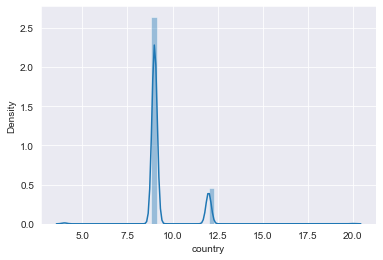

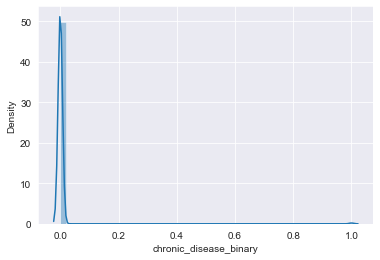

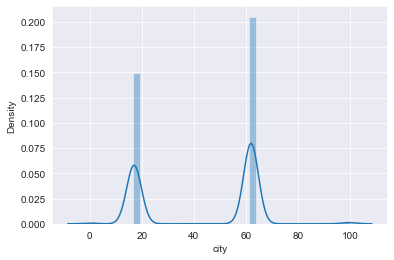

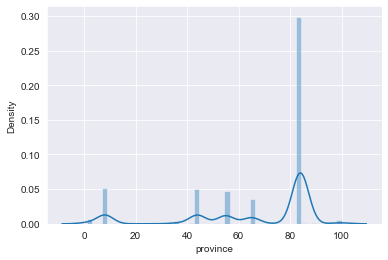

In [117]:
import seaborn as sns
for i, col in enumerate(new_df.columns):
    plt.figure(i)
    sns.distplot(new_df[col])

In [118]:
new_df.isna().sum()

sex                       0
age                       0
outcome                   0
country                   0
chronic_disease_binary    0
city                      0
province                  0
dtype: int64

In [119]:
new_df.corr()

,sex,age,outcome,country,chronic_disease_binary,city,province
sex,1.000000,0.005450,-0.001973,-0.084946,0.009541,0.049850,-0.117841
age,0.005450,1.000000,0.297868,0.202903,0.108619,-0.048163,0.117361
outcome,-0.001973,0.297868,1.000000,0.282108,0.242197,0.118280,-0.055222
country,-0.084946,0.202903,0.282108,1.000000,0.051261,0.320696,-0.063878
chronic_disease_binary,0.009541,0.108619,0.242197,0.051261,1.000000,0.067804,-0.023312
city,0.049850,-0.048163,0.118280,0.320696,0.067804,1.000000,-0.518013
province,-0.117841,0.117361,-0.055222,-0.063878,-0.023312,-0.518013,1.000000


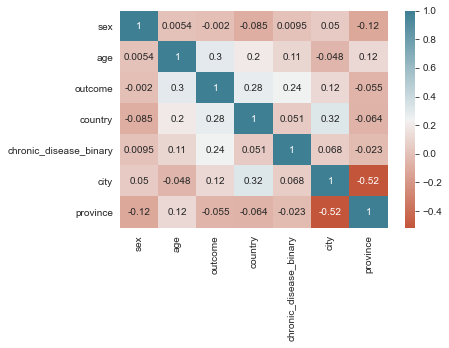

In [120]:
correlation_matrix = new_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap=sns.diverging_palette(20, 220, n=500))
plt.show()

In [121]:
data["city"].value_counts(dropna=False)[:50]

100    977681
62     890865
52     149478
55      56178
53      29170
17      23886
49      23124
0       20815
58      20325
84      15688
12      14800
97      13664
7       13316
83      13085
9       12531
68      11386
74      11326
45      10108
75       9093
64       8206
2        7912
15       7905
56       7608
59       6949
77       6709
31       6451
44       6440
22       6374
46       6158
61       6090
20       6035
3        6006
95       5873
34       5829
13       5818
88       5812
28       5772
72       5666
86       5630
51       5525
36       5422
66       5329
79       5208
90       5103
10       5034
94       5020
69       4952
99       4806
96       4680
32       4677
Name: city, dtype: int64

In [122]:
new_df.head()

,sex,age,outcome,country,chronic_disease_binary,city,province
1,1.0,78.0,1.0,10,0,62,93
2,0.0,61.0,0.0,12,0,100,100
113,1.0,28.0,0.0,12,0,100,100
224,0.0,56.0,0.0,12,0,100,100
335,0.0,79.0,0.0,12,0,62,100


In [123]:
new_df["outcome"].value_counts(dropna=False)

0.0    32233
1.0     1368
Name: outcome, dtype: int64

In [124]:
new_df = new_df4 ######################################################################

In [125]:
y = new_df["outcome"].values
x = new_df.drop(columns=["outcome"]).values

In [126]:
print(f'Number of 1s in y: {np.sum(y)}\nNumber of 0s in y: {len(y)-np.sum(y)}')

Number of 1s in y: 1368.0
Number of 0s in y: 32233.0


## Chi-squared testing - testing independence/dependence

In [127]:
from sklearn.feature_selection import chi2
chi_scores = chi2(x,y)

#first array represents chi square values and second array represnts p-values

prob = 0.95
# interpret p-value
alpha = 1.0 - prob

for p, feature_name in zip(chi_scores[1], new_df4.drop(columns=["outcome"]).columns):
    print('significance=%.3f, p=%.3f feature=%s' % (alpha, p, feature_name))
    if p <= alpha:
        print('Dependent (accept H0)')
    else:
        print('Independent (fail to reject H0)')
    print('\n')

significance=0.050, p=0.827 feature=sex
Independent (fail to reject H0)


significance=0.050, p=0.000 feature=age
Dependent (accept H0)


significance=0.050, p=0.000 feature=country
Dependent (accept H0)


significance=0.050, p=0.000 feature=chronic_disease_binary
Dependent (accept H0)


significance=0.050, p=0.000 feature=city
Dependent (accept H0)


significance=0.050, p=0.000 feature=province
Dependent (accept H0)




After carrying out the chi-sqaured test, we can see the 'sex' feature is independent of the y column 'outcome' and we fail to reject H0. Thus, we will exclude the 'sex' column from our model.

In [128]:
new_df = new_df.drop(columns=["sex"])
x = new_df.drop(columns=["outcome"]).values

## train-test split

In [129]:
from sklearn import model_selection

# 80/20 split
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y,test_size = 0.2,stratify=y, shuffle=True, random_state=101)

In [130]:
print(f'Number of 1s in y_train: {np.sum(y_train)}\nNumber of 0s in y_train: {len(y_train)-np.sum(y_train)}')

Number of 1s in y_train: 1094.0
Number of 0s in y_train: 25786.0


In [131]:
print(len(y_train))
print(sum(y_train))
print(len(y_test))
print(sum(y_test))

26880
1094.0
6721
274.0


## Kolmogorov-Smirnov test - testing similarity of distribution

In [132]:
from scipy import stats

In [133]:
prob = 0.99
# interpret p-value
alpha = 1.0 - prob

ts, p = stats.ks_2samp(y_train, y_test)
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('The two distributions are different (reject H0)')
else:
    print('The two distributions are the same (fail to reject H0)')
print('\n')

significance=0.010, p=1.000
The two distributions are the same (fail to reject H0)




In [134]:
prob = 0.99
# interpret p-value
alpha = 1.0 - prob

for index in range(x_train.shape[1]):
    feature_name = new_df.columns[index]
    ts, p = stats.ks_2samp(x_train[:,index], x_test[:,index])
    print('significance=%.3f, p=%.3f feature=%s' % (alpha, p, feature_name))
    if p <= alpha:
        print('The two distributions are different (reject H0)')
    else:
        print('The two distributions are the same (fail to reject H0)')
    print('\n')

significance=0.010, p=0.636 feature=age
The two distributions are the same (fail to reject H0)


significance=0.010, p=0.997 feature=outcome
The two distributions are the same (fail to reject H0)


significance=0.010, p=1.000 feature=country
The two distributions are the same (fail to reject H0)


significance=0.010, p=1.000 feature=chronic_disease_binary
The two distributions are the same (fail to reject H0)


significance=0.010, p=0.990 feature=city
The two distributions are the same (fail to reject H0)




Since p value is not less than significance level, we fail to reject H0 and can infer that the samples were drawn from the same distribtion

## Standardise features

In [135]:
from sklearn import preprocessing


x_train_std = preprocessing.StandardScaler().fit_transform(x_train)
x_test_std = preprocessing.StandardScaler().fit_transform(x_test)

## Baseline

In [136]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, mean_squared_error, mean_absolute_error, roc_curve, classification_report
from sklearn import metrics

In [137]:
def get_stats(y_test, y_pred):
    results_table = pd.DataFrame({
        "Accuracy": [accuracy_score(y_test, y_pred)],
        "f1 score": [f1_score(y_test, y_pred)],
        "RMSE": [np.sqrt(mean_squared_error(y_test, y_pred))],
        "MAE": [(mean_absolute_error(y_test, y_pred))]
    })
    #Ploting the confusion matrix
    print("Confusion matrix:\n",confusion_matrix(y_test, y_pred))
    print("Classification Report:\n",classification_report(y_test, y_pred))
    return results_table

In [138]:
def predict_majority(y_train, y_test):
    prediction = max(y_train, key=list(y_train).count)
    return [prediction for _ in range(len(y_test))]

y_baseline_pred = predict_majority(y_train, y_test)


baseline_stats = get_stats(y_test, y_baseline_pred)
baseline_stats

Confusion matrix:
 [[6447    0]
 [ 274    0]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      6447
         1.0       0.00      0.00      0.00       274

    accuracy                           0.96      6721
   macro avg       0.48      0.50      0.49      6721
weighted avg       0.92      0.96      0.94      6721



C:\Users\44759\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\44759\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\44759\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Accuracy,f1 score,RMSE,MAE
0,0.959232,0.0,0.20191,0.040768


The baseline model predicts the majority class for all instances and has a 96% accuracy due to the skewness of data twords the majority class.

The f1 score is 0 since no instances of the minority class were predicted

In [139]:
def get_prediction(model_type, x_train, y_train, x_test, y_test):
    model = model_type
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    return y_pred

## Logistic Regression cross-validation

In [140]:
def gen_roc(y_test, y_pred, title="ROC curve"):
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title(title)
    plt.plot(fpr, tpr, 'b', label = f'AUC = {roc_auc}')
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

Average accuracy of cv on the test fold: 0.9641369047619047
Average f1 score of cv on the test fold: 0.3248577943698491


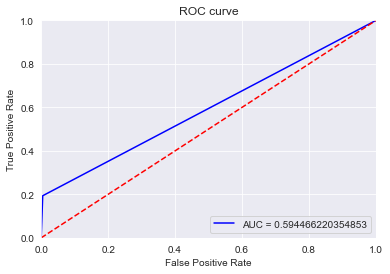

,model,cv_acc,cv_f1,roc-auc
0,LR,0.964137,0.324858,0.594466


In [141]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LogisticRegression

scoring={"accuracy":"accuracy", "f1":"f1"}
scores = cross_validate(LogisticRegression(random_state=101), 
                         x_train_std,
                         y_train,
                         scoring=scoring,
                         cv=5,
                         n_jobs=-1)

print(f'Average accuracy of cv on the test fold: {np.mean(scores["test_accuracy"])}')
print(f'Average f1 score of cv on the test fold: {np.mean(scores["test_f1"])}')

y_pred = get_prediction(LogisticRegression(random_state=101),
                        x_train_std,
                        y_train,
                        x_test_std,
                        y_test)

gen_roc(y_test, y_pred)

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr) # get ROC value on test set

LR_orig_cv_df = pd.DataFrame({
    "model":["LR"],
    "cv_acc":[np.mean(scores["test_accuracy"])],
    "cv_f1":[np.mean(scores["test_f1"])],
    "roc-auc":[roc_auc]
}) 
LR_orig_cv_df

Unbalanced nature of the dataset means that the accuracy metric will be high even if the model picks 1 all the time

## SVM cross-validation

Average accuracy of cv on the test fold: 0.9671875
Average f1 score of cv on the test fold: 0.3852824921264193


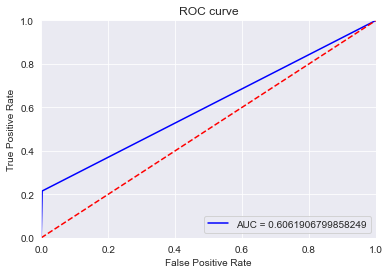

,model,cv_acc,cv_f1,roc-auc
0,SVM,0.967187,0.385282,0.606191


In [142]:
from sklearn.svm import SVC
scoring={"accuracy":"accuracy", "f1":"f1"}
scores = cross_validate(SVC(random_state=101), 
                         x_train_std,
                         y_train,
                         scoring=scoring,
                         cv=5,
                         n_jobs=-1)

print(f'Average accuracy of cv on the test fold: {np.mean(scores["test_accuracy"])}')
print(f'Average f1 score of cv on the test fold: {np.mean(scores["test_f1"])}')

y_pred = get_prediction(SVC(random_state=101),
                        x_train_std,
                        y_train,
                        x_test_std,
                        y_test)

gen_roc(y_test, y_pred)

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr) # get ROC value on test set

SVM_orig_cv_df = pd.DataFrame({
    "model":["SVM"],
    "cv_acc":[np.mean(scores["test_accuracy"])],
    "cv_f1":[np.mean(scores["test_f1"])],
    "roc-auc":[roc_auc]
}) 
SVM_orig_cv_df

## Decision Tree cross-validation

Average accuracy of cv on the test fold: 0.9637276785714285
Average f1 score of cv on the test fold: 0.4147304631302286


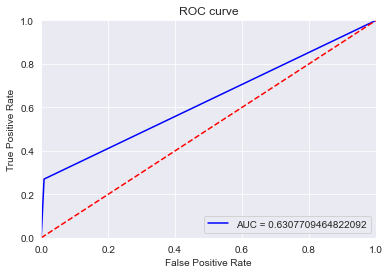

,model,cv_acc,cv_f1,roc-auc
0,DT,0.963728,0.41473,0.630771


In [143]:
from sklearn.tree import DecisionTreeClassifier
scoring={"accuracy":"accuracy", "f1":"f1"}
scores = cross_validate(DecisionTreeClassifier(random_state=101), 
                         x_train_std,
                         y_train,
                         scoring=scoring,
                         cv=5,
                         n_jobs=-1)

print(f'Average accuracy of cv on the test fold: {np.mean(scores["test_accuracy"])}')
print(f'Average f1 score of cv on the test fold: {np.mean(scores["test_f1"])}')

y_pred = get_prediction(DecisionTreeClassifier(random_state=101),
                        x_train_std,
                        y_train,
                        x_test_std,
                        y_test)

gen_roc(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

DT_orig_cv_df = pd.DataFrame({
    "model":["DT"],
    "cv_acc":[np.mean(scores["test_accuracy"])],
    "cv_f1":[np.mean(scores["test_f1"])],
    "roc-auc":[roc_auc]
}) 
DT_orig_cv_df

## Random forest cross-validation

Average accuracy of cv on the test fold: 0.9644345238095239
Average f1 score of cv on the test fold: 0.43469260881281757


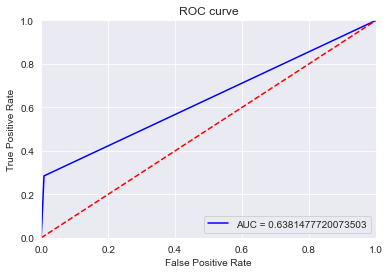

,model,cv_acc,cv_f1,roc-auc
0,RF,0.964435,0.434693,0.638148


In [144]:
from sklearn.ensemble import RandomForestClassifier
scoring={"accuracy":"accuracy", "f1":"f1"}
scores = cross_validate(RandomForestClassifier(), 
                         x_train_std,
                         y_train,
                         scoring=scoring,
                         cv=5,
                         n_jobs=-1)

print(f'Average accuracy of cv on the test fold: {np.mean(scores["test_accuracy"])}')
print(f'Average f1 score of cv on the test fold: {np.mean(scores["test_f1"])}')

y_pred = get_prediction(RandomForestClassifier(),
                        x_train_std,
                        y_train,
                        x_test_std,
                        y_test)

gen_roc(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

RF_orig_cv_df = pd.DataFrame({
    "model":["RF"],
    "cv_acc":[np.mean(scores["test_accuracy"])],
    "cv_f1":[np.mean(scores["test_f1"])],
    "roc-auc":[roc_auc]
}) 
RF_orig_cv_df

In [145]:
initial_cv_df = pd.concat([
                    LR_orig_cv_df,
                    SVM_orig_cv_df,
                    DT_orig_cv_df,
                    RF_orig_cv_df
                ], axis=0)
initial_cv_df

,model,cv_acc,cv_f1,roc-auc
0,LR,0.964137,0.324858,0.594466
0,SVM,0.967187,0.385282,0.606191
0,DT,0.963728,0.414730,0.630771
0,RF,0.964435,0.434693,0.638148


## SMOTE oversampling

In [146]:
# Try smote oversampling:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=101)
X_train_res, y_train_res = sm.fit_resample(x_train_std, y_train)

unique, counts = np.unique(y_train_res, return_counts=True)
print(dict(zip(unique, counts)))

{0.0: 25786, 1.0: 25786}


In [147]:
assert(sum(y_train_res)/len(y_train_res)==0.5) # 0.5 means equal number of 0s and 1s

In [148]:
print(len(y_test))
print(sum(y_test))

6721
274.0


## Optimising Logistic Regression with GridSearchCV

In [149]:
def gen_gridsearch_df(gs_model):
    """Generate a pandas dataframe containing the parameters
    used for training with the mean_score for the test"""
    cols = gs_model.cv_results_["params"][0].keys()
    performance_dict = {}
    for key in cols:
        performance_dict[key] = []

    for comb in gs_model.cv_results_["params"]:
        for key in cols:
            performance_dict[key].append(comb[key])
    gridsearch_df = pd.concat([
        pd.DataFrame(performance_dict),
        pd.DataFrame({
            "mean_accuracy":gs_model.cv_results_["mean_test_acc"],
            "mean_f1":gs_model.cv_results_["mean_test_f1"]
        })
        ], axis=1)
    return gridsearch_df

In [150]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

scoring = {"acc":"accuracy", "f1":"f1"}

# Create param grid.

param_grid = {
    'C':[0.001,0.01,0.1,1,10],
     'solver' : ['liblinear'],
    'class_weight' : [{0: i/100, 1:1-(i/100)} for i in range(1,100)],
    'penalty' : ["l1", "l2"]
}
base_estimator = LogisticRegression(max_iter=1000, random_state=101)
# Create grid search object

LR_gs = GridSearchCV(base_estimator,
                   param_grid = param_grid,
                   cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=101),
                   verbose=True,
                   n_jobs=-1,
                   return_train_score=True,
                   scoring=scoring,
                   # output of best_score will be based on f1 score
                   refit="f1")

# Fit on data
best_LR_gs = LR_gs.fit(X_train_res, y_train_res)

print(f'\nBest Parameters:\n{best_LR_gs.best_params_}\n')
print(f'Best f1 Score:\n{best_LR_gs.best_score_}\n\n')

Fitting 5 folds for each of 990 candidates, totalling 4950 fits

Best Parameters:
{'C': 0.1, 'class_weight': {0: 0.42, 1: 0.5800000000000001}, 'penalty': 'l1', 'solver': 'liblinear'}

Best f1 Score:
0.8407190154740946




In [151]:
best_LR_gs.best_score_

0.8407190154740946

In [152]:
LR_gridsearch_df = gen_gridsearch_df(best_LR_gs)
LR_gridsearch_df

,C,class_weight,penalty,solver,mean_accuracy,mean_f1
0,0.001,"{0: 0.01, 1: 0.99}",l1,liblinear,0.500019,0.666675
1,0.001,"{0: 0.01, 1: 0.99}",l2,liblinear,0.564997,0.696256
2,0.001,"{0: 0.02, 1: 0.98}",l1,liblinear,0.500155,0.666736
3,0.001,"{0: 0.02, 1: 0.98}",l2,liblinear,0.576437,0.701834
4,0.001,"{0: 0.03, 1: 0.97}",l1,liblinear,0.515357,0.673204
...,...,...,...,...,...,...
985,10.000,"{0: 0.97, 1: 0.030000000000000027}",l2,liblinear,0.581808,0.284014
986,10.000,"{0: 0.98, 1: 0.020000000000000018}",l1,liblinear,0.557706,0.208483
987,10.000,"{0: 0.98, 1: 0.020000000000000018}",l2,liblinear,0.557686,0.208421
988,10.000,"{0: 0.99, 1: 0.010000000000000009}",l1,liblinear,0.540351,0.150235


In [153]:
def gen_test_train_df(model, k=5):
    folds = []
    train_fold_accs = []
    train_fold_f1s = []
    test_fold_accs = []
    test_fold_f1s = []
    for i in range(k):
        folds.append(i+1)
        train_fold_accs.append(np.mean(model.cv_results_[f'split{i}_train_acc']))
        train_fold_f1s.append(np.mean(model.cv_results_[f'split{i}_train_f1']))
        test_fold_accs.append(np.mean(model.cv_results_[f'split{i}_test_acc']))
        test_fold_f1s.append(np.mean(model.cv_results_[f'split{i}_test_f1']))
    folds_perf_df = pd.DataFrame({
        "fold":folds,
        "mean_train_accuracy": [np.mean(model.cv_results_["mean_train_acc"]) for _ in range(k)],
        "mean_test_accuracy": [np.mean(model.cv_results_["mean_test_acc"]) for _ in range(k)],
        "train_accuracy":train_fold_accs,
        "test_accuracy":test_fold_accs,
        "mean_train_f1": [np.mean(model.cv_results_["mean_train_f1"]) for _ in range(k)],
        "mean_test_f1": [np.mean(model.cv_results_["mean_test_f1"]) for _ in range(k)],
        "train_f1":train_fold_f1s,
        "test_f1":test_fold_f1s,
    })

    folds_perf_df = folds_perf_df.set_index("fold")
    return folds_perf_df

LR_folds_perf_df = gen_test_train_df(best_LR_gs, 5)
LR_folds_perf_df

,mean_train_accuracy,mean_test_accuracy,train_accuracy,test_accuracy,mean_train_f1,mean_test_f1,train_f1,test_f1
fold,,,,,,,,
1,0.75418,0.75414,0.754671,0.752396,0.733664,0.733609,0.734339,0.732354
2,0.75418,0.75414,0.754711,0.753184,0.733664,0.733609,0.734039,0.733138
3,0.75418,0.75414,0.754011,0.753829,0.733664,0.733609,0.733212,0.732278
4,0.75418,0.75414,0.753414,0.756533,0.733664,0.733609,0.732781,0.738156
5,0.75418,0.75414,0.754093,0.754756,0.733664,0.733609,0.733947,0.732118


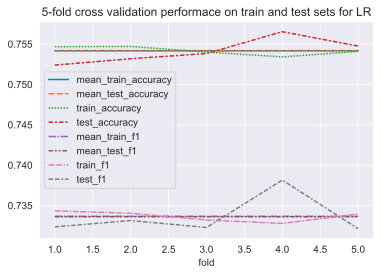

In [202]:
ax = sns.lineplot(data=LR_folds_perf_df)

plt.title("5-fold cross validation performace on train and test sets for LR")
plt.show()

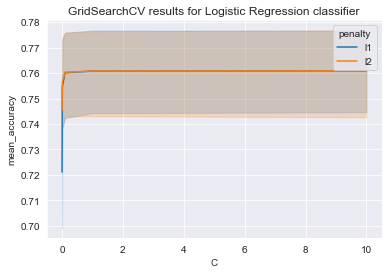

In [155]:
sns.lineplot(data=LR_gridsearch_df,x="C", y="mean_accuracy", hue="penalty")
plt.title("GridSearchCV results for Logistic Regression classifier")
plt.show()

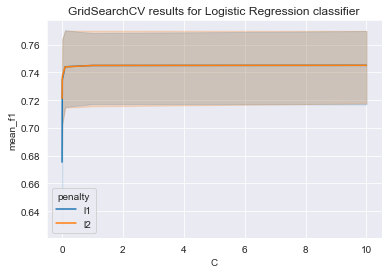

In [156]:
sns.lineplot(data=LR_gridsearch_df,x="C", y="mean_f1", hue="penalty")
plt.title("GridSearchCV results for Logistic Regression classifier")
plt.show()

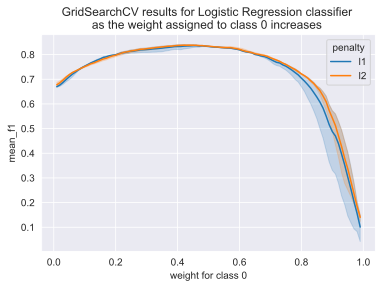

In [203]:
ax = sns.lineplot(data=LR_gridsearch_df,x=pd.Series([i[0] for i in LR_gridsearch_df["class_weight"]]), y="mean_f1", hue="penalty")
ax.set_xlabel("weight for class 0")
plt.title("GridSearchCV results for Logistic Regression classifier \nas the weight assigned to class 0 increases ")
plt.show()

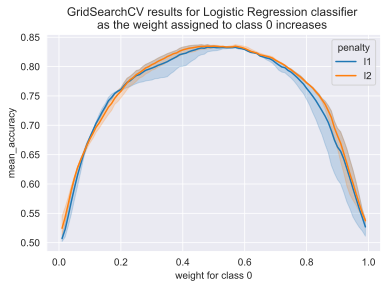

In [204]:
ax = sns.lineplot(data=LR_gridsearch_df,x=pd.Series([i[0] for i in LR_gridsearch_df["class_weight"]]), y="mean_accuracy", hue="penalty")
ax.set_xlabel("weight for class 0")
plt.title("GridSearchCV results for Logistic Regression classifier \nas the weight assigned to class 0 increases ")
plt.show()

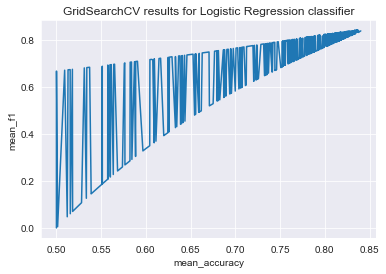

In [159]:
sns.lineplot(data=LR_gridsearch_df,x="mean_accuracy", y="mean_f1")
plt.title("GridSearchCV results for Logistic Regression classifier")
plt.show()

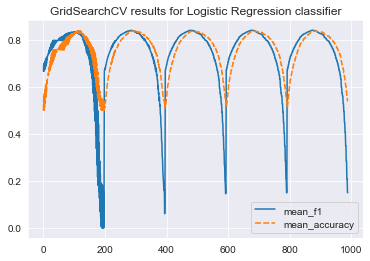

In [160]:
sns.lineplot(data=LR_gridsearch_df[["mean_f1", "mean_accuracy"]])
plt.title("GridSearchCV results for Logistic Regression classifier")
plt.show()

In [161]:
def gen_roc_auc_plot(y_test, y_pred, title='ROC'):
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    print(f'roc-auc score is: {roc_auc}')

    plt.title(title)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return roc_auc

In [162]:
from sklearn.metrics import precision_recall_curve

def pr_auc_plot(y_test, y_pred, title='Precsion-recall curve'):
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
    pr_auc = metrics.auc(recall, precision)
    print(f'precision-recall auc score is: {pr_auc}')
    plt.title(title)
    plt.plot(precision, recall, 'b', label = 'AUC = %0.2f' % pr_auc)
    plt.legend(loc = 'lower right')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.show()
    return pr_auc

## LR results on the hidden test set

In [163]:
LR_gs_y_pred = best_LR_gs.predict(x_test_std)
LR_stats = get_stats(y_test, LR_gs_y_pred)
LR_stats

Confusion matrix:
 [[5124 1323]
 [  39  235]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.79      0.88      6447
         1.0       0.15      0.86      0.26       274

    accuracy                           0.80      6721
   macro avg       0.57      0.83      0.57      6721
weighted avg       0.96      0.80      0.86      6721



,Accuracy,f1 score,RMSE,MAE
0,0.797352,0.25655,0.450165,0.202648


roc-auc score is: 0.8262262535961387


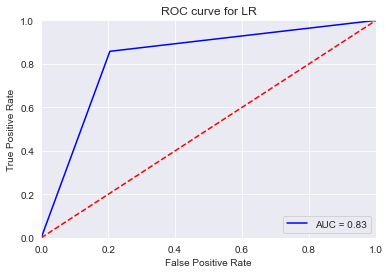

In [164]:
LR_ROC_AUC = gen_roc_auc_plot(y_test, LR_gs_y_pred, "ROC curve for LR")

precision-recall auc score is: 0.5071506722939414


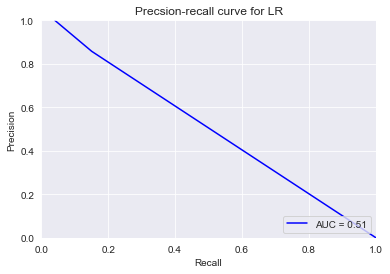

In [165]:
LR_PR_AUC = pr_auc_plot(y_test, LR_gs_y_pred, title='Precsion-recall curve for LR')

In [166]:
LR_stats = pd.concat([
                LR_stats,
                pd.DataFrame({"PR-AUC":[LR_PR_AUC]}),
                pd.DataFrame({"ROC-AUC":[LR_ROC_AUC]})
            ], axis=1)
LR_stats

,Accuracy,f1 score,RMSE,MAE,PR-AUC,ROC-AUC
0,0.797352,0.25655,0.450165,0.202648,0.507151,0.826226


## Optimising SVM with GridSearchCV

In [167]:
scoring = {"acc":"accuracy", "f1":"f1"}

param_grid = [{'kernel': ['rbf'],
               'gamma': [0.001, 0.0001],
                'C': [1, 10, 100, 1000]}]


base_estimator = SVC(random_state=101)
# Create grid search object

SVM_gs = GridSearchCV(base_estimator,
                   param_grid = param_grid,
                   cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=101),
                   verbose=2,
                   n_jobs=-1,
                   return_train_score=True,
                   scoring=scoring,
                   refit="f1")

# Fit on data
best_SVM_gs = SVM_gs.fit(X_train_res, y_train_res)
print(best_SVM_gs.get_params())

print(f'\nBest Parameters:\n{best_SVM_gs.best_params_}\n')
print(f'Best f1 Score on cv:\n{best_SVM_gs.best_score_}\n\n')

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'cv': StratifiedKFold(n_splits=5, random_state=101, shuffle=True), 'error_score': nan, 'estimator__C': 1.0, 'estimator__break_ties': False, 'estimator__cache_size': 200, 'estimator__class_weight': None, 'estimator__coef0': 0.0, 'estimator__decision_function_shape': 'ovr', 'estimator__degree': 3, 'estimator__gamma': 'scale', 'estimator__kernel': 'rbf', 'estimator__max_iter': -1, 'estimator__probability': False, 'estimator__random_state': 101, 'estimator__shrinking': True, 'estimator__tol': 0.001, 'estimator__verbose': False, 'estimator': SVC(random_state=101), 'n_jobs': -1, 'param_grid': [{'kernel': ['rbf'], 'gamma': [0.001, 0.0001], 'C': [1, 10, 100, 1000]}], 'pre_dispatch': '2*n_jobs', 'refit': 'f1', 'return_train_score': True, 'scoring': {'acc': 'accuracy', 'f1': 'f1'}, 'verbose': 2}

Best Parameters:
{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Best f1 Score on cv:
0.8671790853676171




In [168]:
SVM_gridsearch_df = gen_gridsearch_df(best_SVM_gs)
SVM_gridsearch_df

,C,gamma,kernel,mean_accuracy,mean_f1
0,1,0.0010,rbf,0.849957,0.850011
1,1,0.0001,rbf,0.837877,0.832790
2,10,0.0010,rbf,0.853234,0.854261
3,10,0.0001,rbf,0.835027,0.832775
4,100,0.0010,rbf,0.862503,0.863862
5,100,0.0001,rbf,0.848755,0.847806
6,1000,0.0010,rbf,0.864946,0.867179
7,1000,0.0001,rbf,0.853176,0.854333


In [169]:
SVM_folds_perf_df = gen_test_train_df(best_SVM_gs, 5)
SVM_folds_perf_df

,mean_train_accuracy,mean_test_accuracy,train_accuracy,test_accuracy,mean_train_f1,mean_test_f1,train_f1,test_f1
fold,,,,,,,,
1,0.85084,0.850685,0.850840,0.850739,0.850527,0.850377,0.850534,0.850954
2,0.85084,0.850685,0.851768,0.847176,0.850527,0.850377,0.851468,0.847101
3,0.85084,0.850685,0.850096,0.853488,0.850527,0.850377,0.849616,0.853124
4,0.85084,0.850685,0.850768,0.851597,0.850527,0.850377,0.850585,0.851345
5,0.85084,0.850685,0.850729,0.850422,0.850527,0.850377,0.850434,0.849362


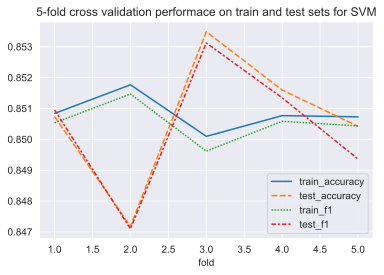

In [201]:
ax = sns.lineplot(data=SVM_folds_perf_df[[
    "train_accuracy","test_accuracy","train_f1","test_f1"
]])

plt.title("5-fold cross validation performace on train and test sets for SVM")
plt.show()

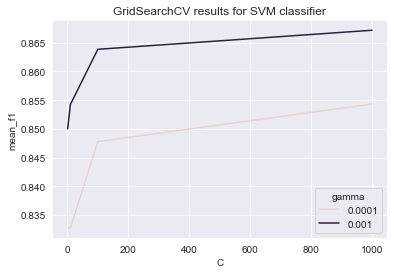

In [171]:
sns.lineplot(data=SVM_gridsearch_df,x="C", y="mean_f1", hue="gamma")
plt.title("GridSearchCV results for SVM classifier")
plt.show()

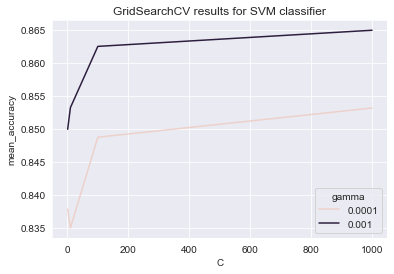

In [172]:
sns.lineplot(data=SVM_gridsearch_df,x="C", y="mean_accuracy", hue="gamma")
plt.title("GridSearchCV results for SVM classifier")
plt.show()

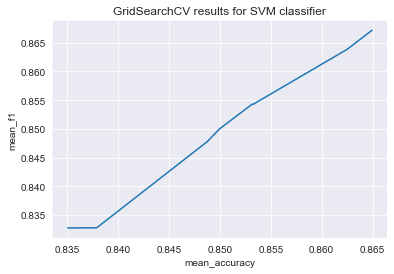

In [173]:
sns.lineplot(data=SVM_gridsearch_df,x="mean_accuracy", y="mean_f1")
plt.title("GridSearchCV results for SVM classifier")
plt.show()

## SVM results on the hidden test set

In [174]:
SVM_gs_y_pred = best_SVM_gs.predict(x_test_std)
SVM_stats = get_stats(y_test, SVM_gs_y_pred)
SVM_stats

Confusion matrix:
 [[5436 1011]
 [  37  237]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.84      0.91      6447
         1.0       0.19      0.86      0.31       274

    accuracy                           0.84      6721
   macro avg       0.59      0.85      0.61      6721
weighted avg       0.96      0.84      0.89      6721



,Accuracy,f1 score,RMSE,MAE
0,0.844071,0.311432,0.394879,0.155929


roc-auc score is: 0.8540731897029005


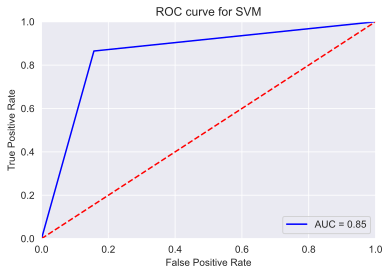

In [205]:
SVM_ROC_AUC = gen_roc_auc_plot(y_test, SVM_gs_y_pred, "ROC curve for SVM")

precision-recall auc score is: 0.5301862414840944


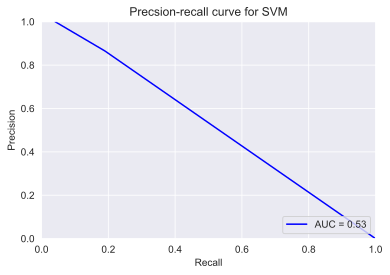

In [206]:
SVM_PR_AUC = pr_auc_plot(y_test, SVM_gs_y_pred, title='Precsion-recall curve for SVM')

In [177]:
SVM_stats = pd.concat([
                SVM_stats,
                pd.DataFrame({"PR-AUC":[SVM_PR_AUC]}),
                pd.DataFrame({"ROC-AUC":[SVM_ROC_AUC]})
            ], axis=1)
SVM_stats

,Accuracy,f1 score,RMSE,MAE,PR-AUC,ROC-AUC
0,0.844071,0.311432,0.394879,0.155929,0.530186,0.854073


## Optimising RF with GridSearchCV

In [178]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': [1200, 2000],
               'max_features': [0.75, 0.9],
               'max_depth': [15, 30],
               'min_samples_split': [2, 5],
               'min_samples_leaf': [1, 2, 4]}

scoring = {"acc":"accuracy", "f1":"f1"}
rf = RandomForestClassifier(random_state=101)

RF_gs = GridSearchCV(estimator = rf,
                     param_grid = param_grid, 
                     cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=101),
                     n_jobs = -1,
                     verbose = 2,
                     return_train_score=True,
                     scoring=scoring,
                     refit="f1")

best_RF_gs = RF_gs.fit(X_train_res, y_train_res)
print(best_RF_gs.get_params())

print(f'\nBest Parameters:\n{best_RF_gs.best_params_}\n')
print(f'Best f1 Score on cv:\n{best_RF_gs.best_score_}\n\n')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
{'cv': StratifiedKFold(n_splits=5, random_state=101, shuffle=True), 'error_score': nan, 'estimator__bootstrap': True, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': 'auto', 'estimator__max_leaf_nodes': None, 'estimator__max_samples': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__n_estimators': 100, 'estimator__n_jobs': None, 'estimator__oob_score': False, 'estimator__random_state': 101, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': RandomForestClassifier(random_state=101), 'n_jobs': -1, 'param_grid': {'n_estimators': [1200, 2000], 'max_features': [0.75, 0.9], 'max_depth': [15, 30], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2, 

In [179]:
best_RF_gs.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_max_features', 'param_min_samples_leaf', 'param_min_samples_split', 'param_n_estimators', 'params', 'split0_test_acc', 'split1_test_acc', 'split2_test_acc', 'split3_test_acc', 'split4_test_acc', 'mean_test_acc', 'std_test_acc', 'rank_test_acc', 'split0_train_acc', 'split1_train_acc', 'split2_train_acc', 'split3_train_acc', 'split4_train_acc', 'mean_train_acc', 'std_train_acc', 'split0_test_f1', 'split1_test_f1', 'split2_test_f1', 'split3_test_f1', 'split4_test_f1', 'mean_test_f1', 'std_test_f1', 'rank_test_f1', 'split0_train_f1', 'split1_train_f1', 'split2_train_f1', 'split3_train_f1', 'split4_train_f1', 'mean_train_f1', 'std_train_f1'])

In [180]:
RF_gridsearch_df = gen_gridsearch_df(best_RF_gs)
RF_gridsearch_df

,max_depth,max_features,min_samples_leaf,min_samples_split,n_estimators,mean_accuracy,mean_f1
0,15,0.75,1,2,1200,0.940782,0.940955
1,15,0.75,1,2,2000,0.940666,0.940828
2,15,0.75,1,5,1200,0.940297,0.940511
3,15,0.75,1,5,2000,0.940239,0.940460
4,15,0.75,2,2,1200,0.939366,0.939666
5,15,0.75,2,2,2000,0.939405,0.939686
6,15,0.75,2,5,1200,0.939308,0.939607
7,15,0.75,2,5,2000,0.939289,0.939569
8,15,0.75,4,2,1200,0.935643,0.935981
9,15,0.75,4,2,2000,0.935527,0.935881


In [181]:
RF_folds_perf_df = gen_test_train_df(best_RF_gs, 5)
RF_folds_perf_df

,mean_train_accuracy,mean_test_accuracy,train_accuracy,test_accuracy,mean_train_f1,mean_test_f1,train_f1,test_f1
fold,,,,,,,,
1,0.949098,0.939887,0.949037,0.940057,0.949461,0.940108,0.949344,0.940338
2,0.949098,0.939887,0.950045,0.935682,0.949461,0.940108,0.950413,0.935680
3,0.949098,0.939887,0.948372,0.943580,0.949461,0.940108,0.948761,0.943862
4,0.949098,0.939887,0.949195,0.938320,0.949461,0.940108,0.949600,0.938671
5,0.949098,0.939887,0.948839,0.941796,0.949461,0.940108,0.949186,0.941990


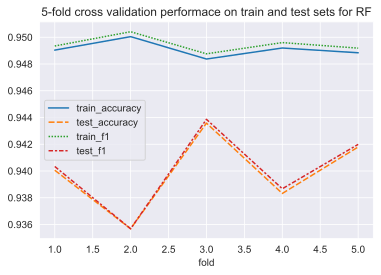

In [200]:
ax = sns.lineplot(data=RF_folds_perf_df[[
    "train_accuracy","test_accuracy","train_f1","test_f1"
]])

plt.title("5-fold cross validation performace on train and test sets for RF")
plt.show()

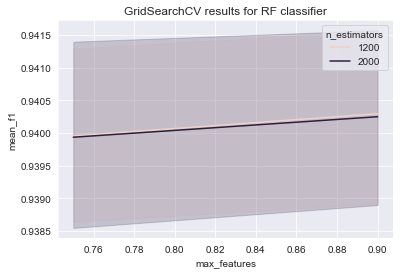

In [183]:
sns.lineplot(data=RF_gridsearch_df,x="max_features", y="mean_f1", hue="n_estimators")
plt.title("GridSearchCV results for RF classifier")
plt.show()

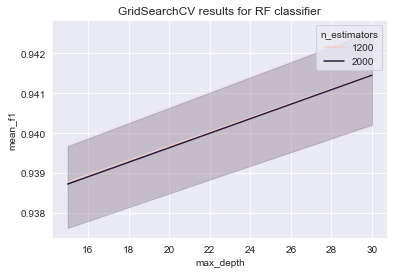

In [184]:
sns.lineplot(data=RF_gridsearch_df,x="max_depth", y="mean_f1", hue="n_estimators")
plt.title("GridSearchCV results for RF classifier")
plt.show()

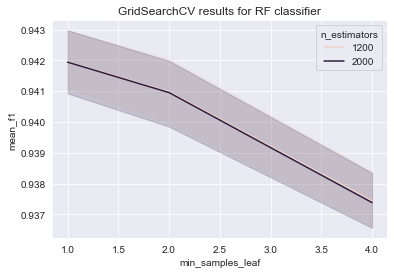

In [185]:
sns.lineplot(data=RF_gridsearch_df,x="min_samples_leaf", y="mean_f1", hue="n_estimators")
plt.title("GridSearchCV results for RF classifier")
plt.show()

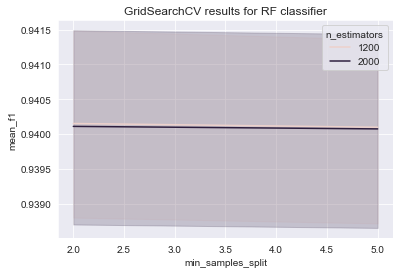

In [186]:
sns.lineplot(data=RF_gridsearch_df,x="min_samples_split", y="mean_f1", hue="n_estimators")
plt.title("GridSearchCV results for RF classifier")
plt.show()

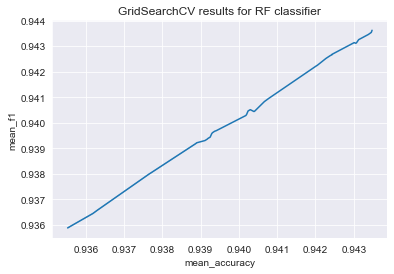

In [187]:
sns.lineplot(data=RF_gridsearch_df,x="mean_accuracy", y="mean_f1")
plt.title("GridSearchCV results for RF classifier")
plt.show()

## RF results on the hidden test set

In [188]:
RF_gs_y_pred = best_RF_gs.predict(x_test_std)
RF_stats = get_stats(y_test, RF_gs_y_pred)
RF_stats

Confusion matrix:
 [[2709 3738]
 [  15  259]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.42      0.59      6447
         1.0       0.06      0.95      0.12       274

    accuracy                           0.44      6721
   macro avg       0.53      0.68      0.36      6721
weighted avg       0.96      0.44      0.57      6721



,Accuracy,f1 score,RMSE,MAE
0,0.441601,0.121283,0.747261,0.558399


roc-auc score is: 0.6827254570959842


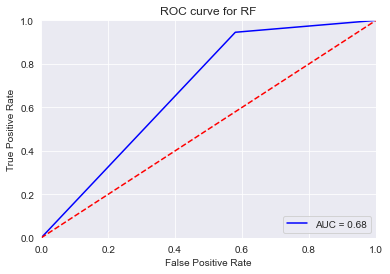

In [189]:
RF_ROC_AUC = gen_roc_auc_plot(y_test, RF_gs_y_pred, title='ROC curve for RF')

precision-recall auc score is: 0.5061429420721079


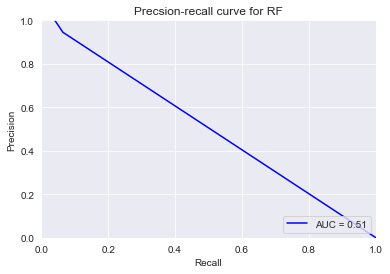

In [190]:
RF_PR_AUC = pr_auc_plot(y_test, RF_gs_y_pred, title='Precsion-recall curve for RF')

In [191]:
RF_stats = pd.concat([
                RF_stats,
                pd.DataFrame({"PR-AUC":[RF_PR_AUC]}),
                pd.DataFrame({"ROC-AUC":[RF_ROC_AUC]})
            ], axis=1)
RF_stats

,Accuracy,f1 score,RMSE,MAE,PR-AUC,ROC-AUC
0,0.441601,0.121283,0.747261,0.558399,0.506143,0.682725


In [192]:
## Baseline scores
b_precision, b_recall, _ = precision_recall_curve(y_test, y_baseline_pred)
baseline_pr_auc = metrics.auc(b_recall, b_precision)

b_fpr, b_tpr, _ = metrics.roc_curve(y_test, y_baseline_pred)
baseline_roc_auc = metrics.auc(b_fpr, b_tpr)

baseline_stats = pd.concat([
                baseline_stats,
                pd.DataFrame({"PR-AUC":[baseline_pr_auc]}),
                pd.DataFrame({"ROC-AUC":[baseline_roc_auc]})
            ], axis=1)
baseline_stats

,Accuracy,f1 score,RMSE,MAE,PR-AUC,ROC-AUC
0,0.959232,0.0,0.20191,0.040768,0.520384,0.5


## Overall scores

In [193]:
test_stats = pd.concat([
    baseline_stats,
    LR_stats,
    SVM_stats,
    RF_stats
], axis=0)
test_stats.index = ["Baseline","LR", "SVM", "RF"]
test_stats

,Accuracy,f1 score,RMSE,MAE,PR-AUC,ROC-AUC
Baseline,0.959232,0.000000,0.201910,0.040768,0.520384,0.500000
LR,0.797352,0.256550,0.450165,0.202648,0.507151,0.826226
SVM,0.844071,0.311432,0.394879,0.155929,0.530186,0.854073
RF,0.441601,0.121283,0.747261,0.558399,0.506143,0.682725


In [194]:
test_stats = test_stats.reset_index()
test_stats

,index,Accuracy,f1 score,RMSE,MAE,PR-AUC,ROC-AUC
0,Baseline,0.959232,0.000000,0.201910,0.040768,0.520384,0.500000
1,LR,0.797352,0.256550,0.450165,0.202648,0.507151,0.826226
2,SVM,0.844071,0.311432,0.394879,0.155929,0.530186,0.854073
3,RF,0.441601,0.121283,0.747261,0.558399,0.506143,0.682725


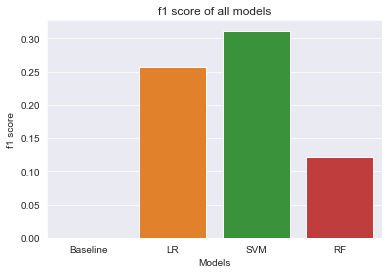

In [195]:
ax = sns.barplot(data=test_stats, x="index", y="f1 score")
ax.set(xlabel='Models')
plt.title("f1 score of all models")
plt.show()

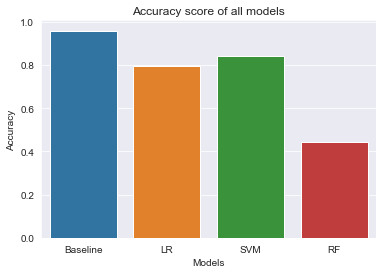

In [196]:
ax = sns.barplot(data=test_stats, x="index", y="Accuracy")
ax.set(xlabel='Models')
plt.title("Accuracy score of all models")
plt.show()

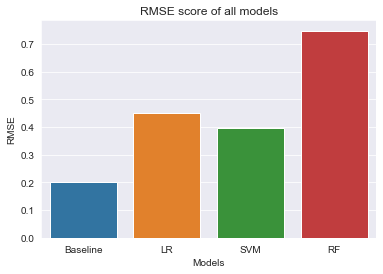

In [197]:
ax= sns.barplot(data=test_stats, x="index", y="RMSE")
ax.set(xlabel='Models')
plt.title("RMSE score of all models")
plt.show()

In [198]:
time.time()-start

6052.080384492874